# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [33]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [47]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Strong' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

Empty DataFrame
Columns: [filename, rays_present, approx_split, Diad1_pos, Diad2_pos, HB1_pos, HB2_pos, C13_pos, Diad1_abs_prom, Diad2_abs_prom, HB1_abs_prom, HB2_abs_prom, C13_abs_prom, Mean_abs_HB_prom, Diad2_HB2_abs_prom_ratio, Diad1_HB1_abs_prom_ratio, Diad1_rel_prom, Diad2_rel_prom, HB1_rel_prom, HB2_rel_prom, C13_rel_prom, Diad1_HB1_Valley_prom, Mean_Diad_HB_Valley_prom, Diad1_prom/std_betweendiads, Diad2_prom/std_betweendiads, Av_Diad_prom/std_betweendiads, C13_prom/HB2_prom, Av_Diad_HB_prom_ratio, Left_vs_Right, Diad2_height, HB2_height, C13_height, Diad1_height, HB1_height, Diad1_Median_Bck, Diad2_Median_Bck, C13_HB2_abs_prom_ratio, Diad2_HB2_Valley_prom, HB1_prom/std_betweendiads, HB2_prom/std_betweendiads]
Index: []

[0 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [35]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

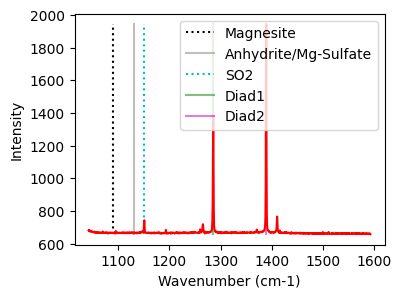

In [36]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [37]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [38]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=721.8389722304812, HB_prom=54.60591259608236, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.536729       1285.536779        0.002315       1285.808093   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent  HB1_Area  HB1_Sigma  \
0           0.686819                  0  1265.299668   148.409   0.893077   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             723.181444        1.868469        0.551366    1.373638   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.068182      1.066055                   0.093657   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.001899  PseudoVoigtModel

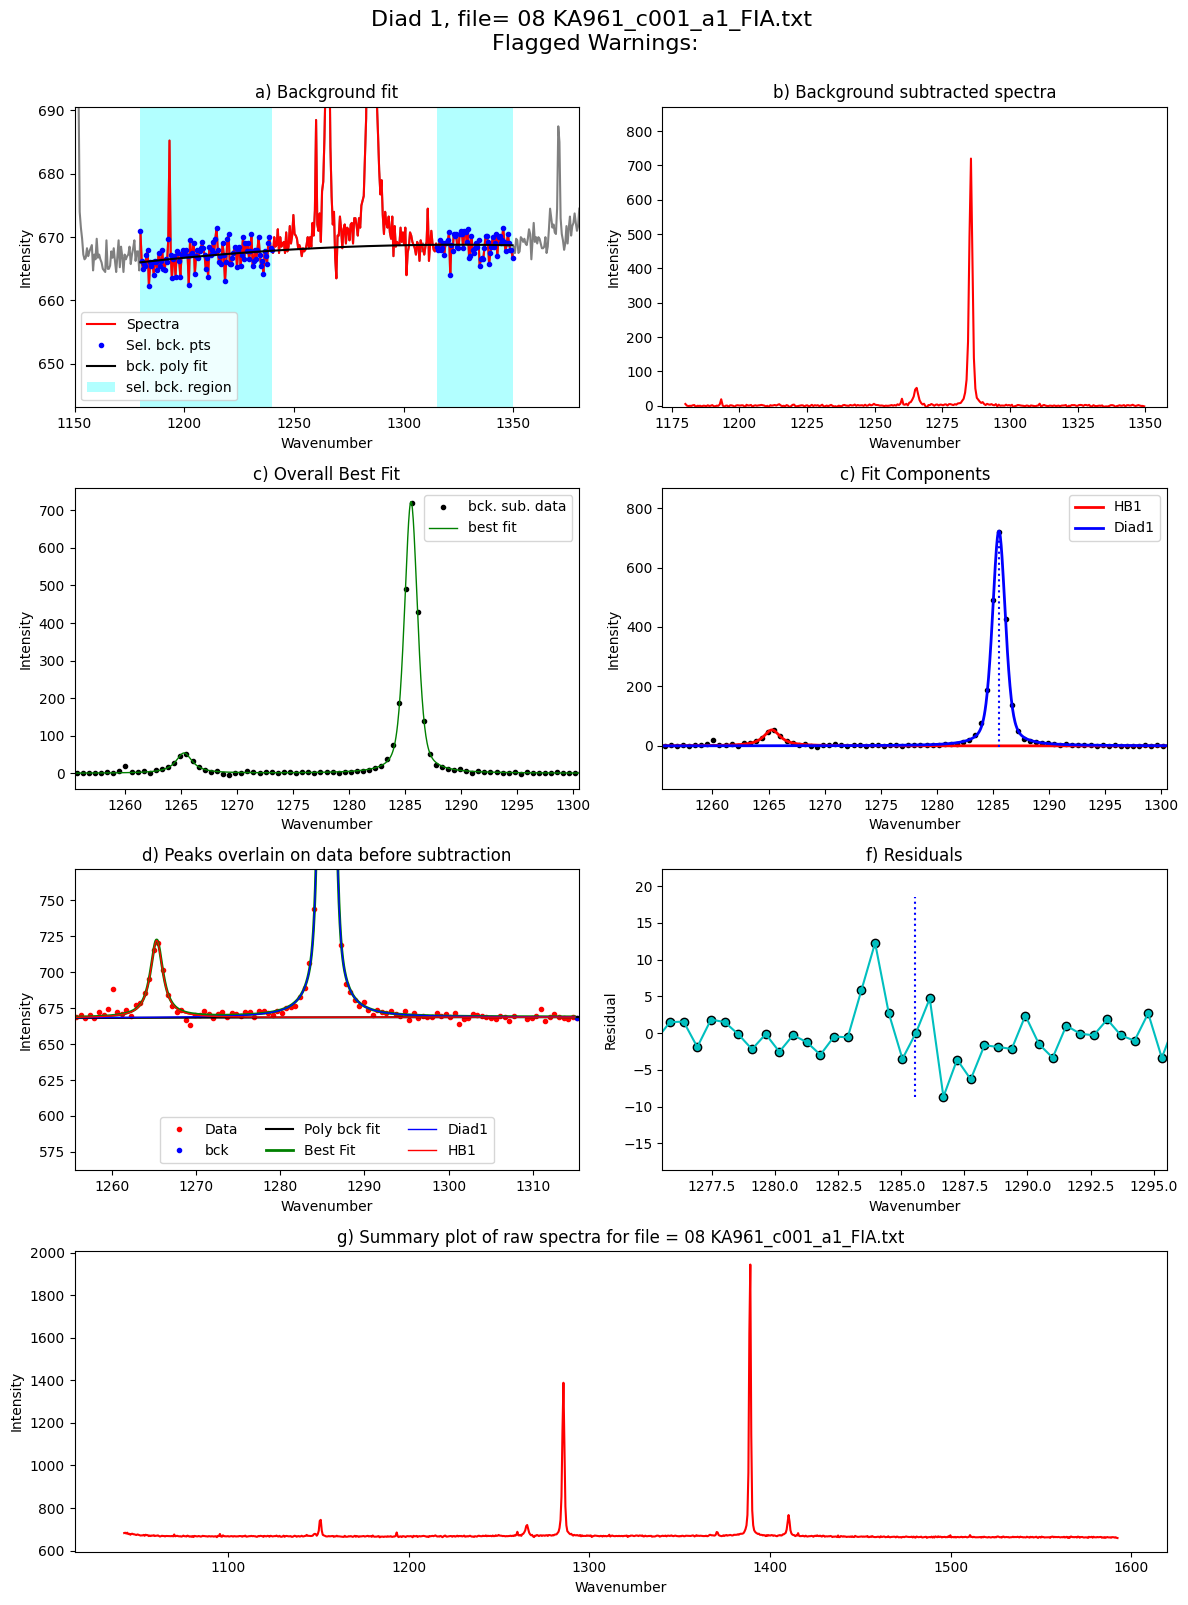

In [39]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [40]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [41]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=204.76746213009255, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1310.5604551626614, HB_prom=102.38373106504628, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.884132       1388.884082         0.00123       1956.047254   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.538689                  0  1410.238585  222.681888    0.72661   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0            1369.551092        2.251306        0.611445    1.077378   

         Diad2_refit  Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.225806      1.222222                   0.243279   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0              0.000787  PseudoVoigtModel

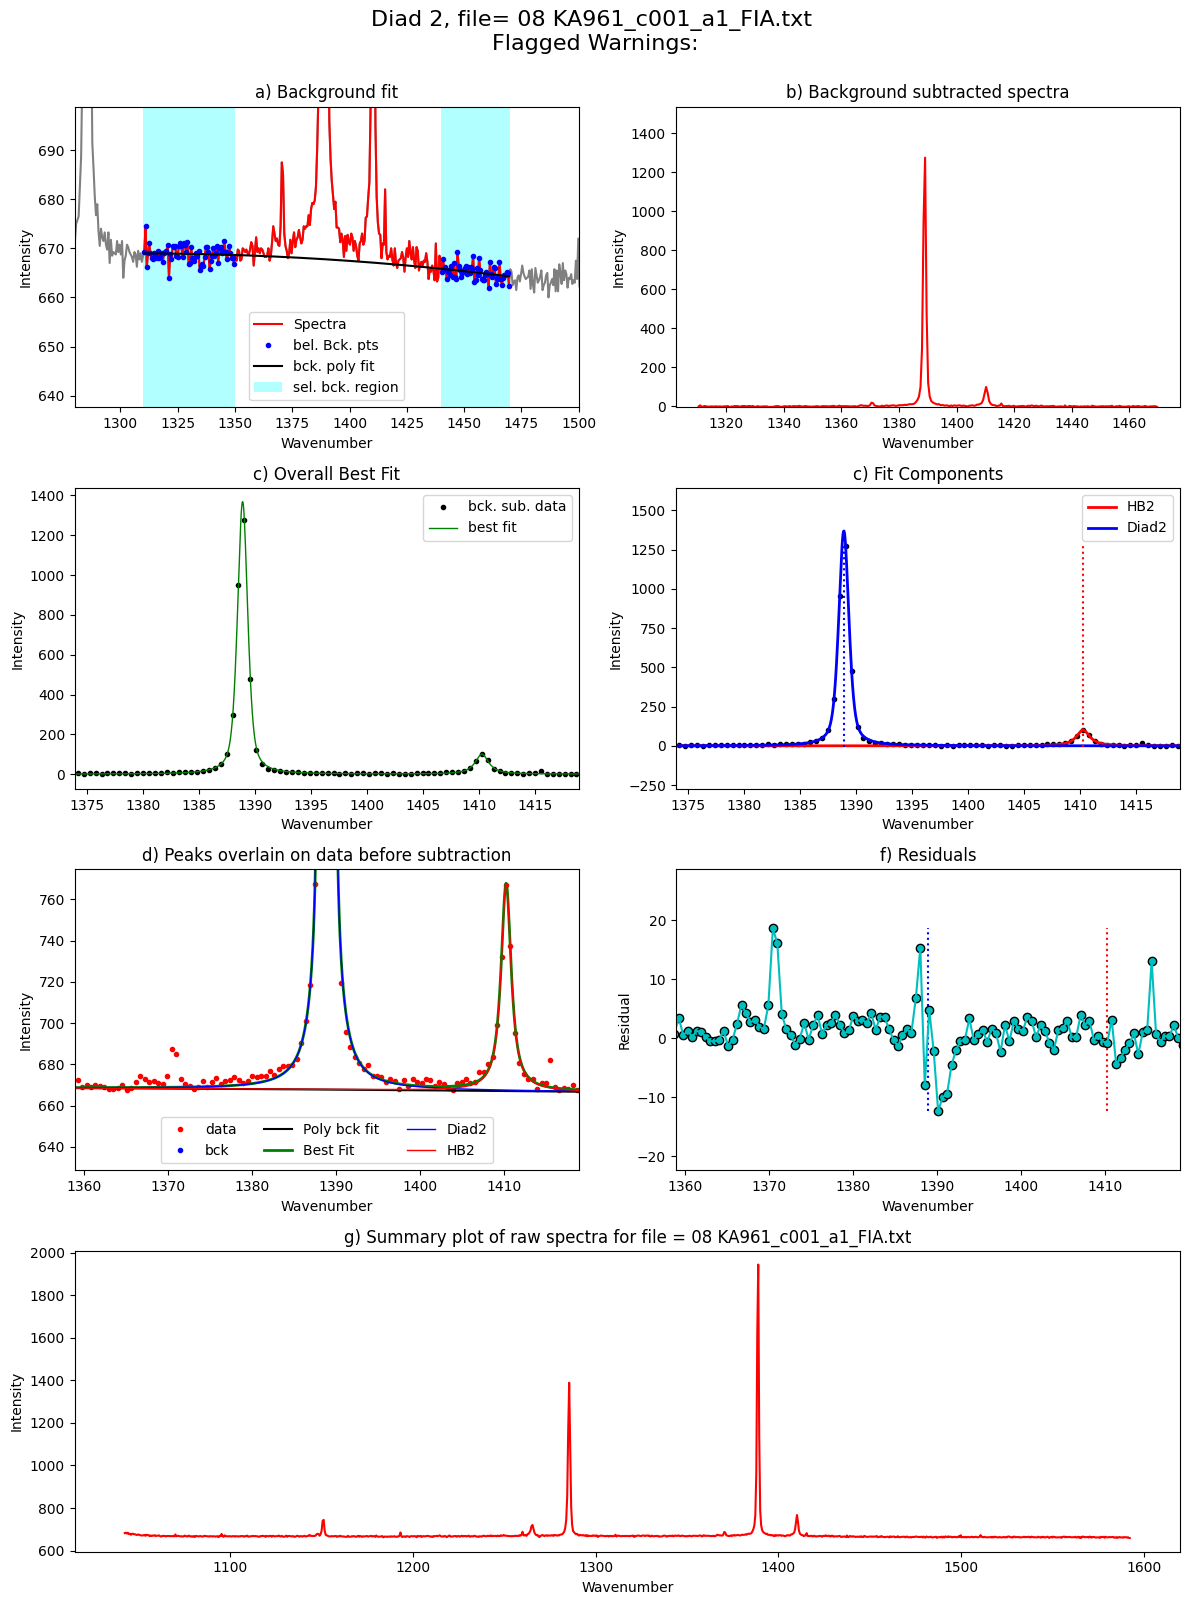

In [42]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]

Processing file: 08 KA961_c001_a1_FIA.txt


  8%|▊         | 1/12 [00:02<00:31,  2.87s/it]

Processing file: 16 de.txt


 17%|█▋        | 2/12 [00:06<00:32,  3.25s/it]

Processing file: 17 KA961_c002a_a1_FIA_r1.txt


 25%|██▌       | 3/12 [00:08<00:25,  2.82s/it]

Processing file: 18 KA961_c002a_a1_FIA_r2.txt


 33%|███▎      | 4/12 [00:10<00:20,  2.55s/it]

Processing file: 19 KA961_c002a_a1_FIA_r3_CRR_DiadFit.txt


 42%|████▏     | 5/12 [00:13<00:17,  2.45s/it]

Processing file: 20 KA961_c002a_a1_FIB_r1.txt


 50%|█████     | 6/12 [00:15<00:14,  2.48s/it]

Processing file: 21 KA961_c002a_a1_FIB_r2.txt


 58%|█████▊    | 7/12 [00:18<00:12,  2.46s/it]

Processing file: 22 KA961_c002a_a1_FIB_r3_CRR_DiadFit.txt


 67%|██████▋   | 8/12 [00:20<00:09,  2.43s/it]

Processing file: 32 KA961_c004_a1_FIA.txt


 75%|███████▌  | 9/12 [00:22<00:07,  2.46s/it]

Processing file: 38 KA961_c007_a1_FIA_10mw_CRR_DiadFit.txt
refit attempt 1


 83%|████████▎ | 10/12 [00:26<00:05,  2.79s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 39 KA961_c007_a1_FIA_CRR_DiadFit.txt
refit attempt 1


 92%|█████████▏| 11/12 [00:30<00:03,  3.07s/it]

Processing file: 43 KA961_c009a_a1_FIA.txt


100%|██████████| 12/12 [00:32<00:00,  2.72s/it]


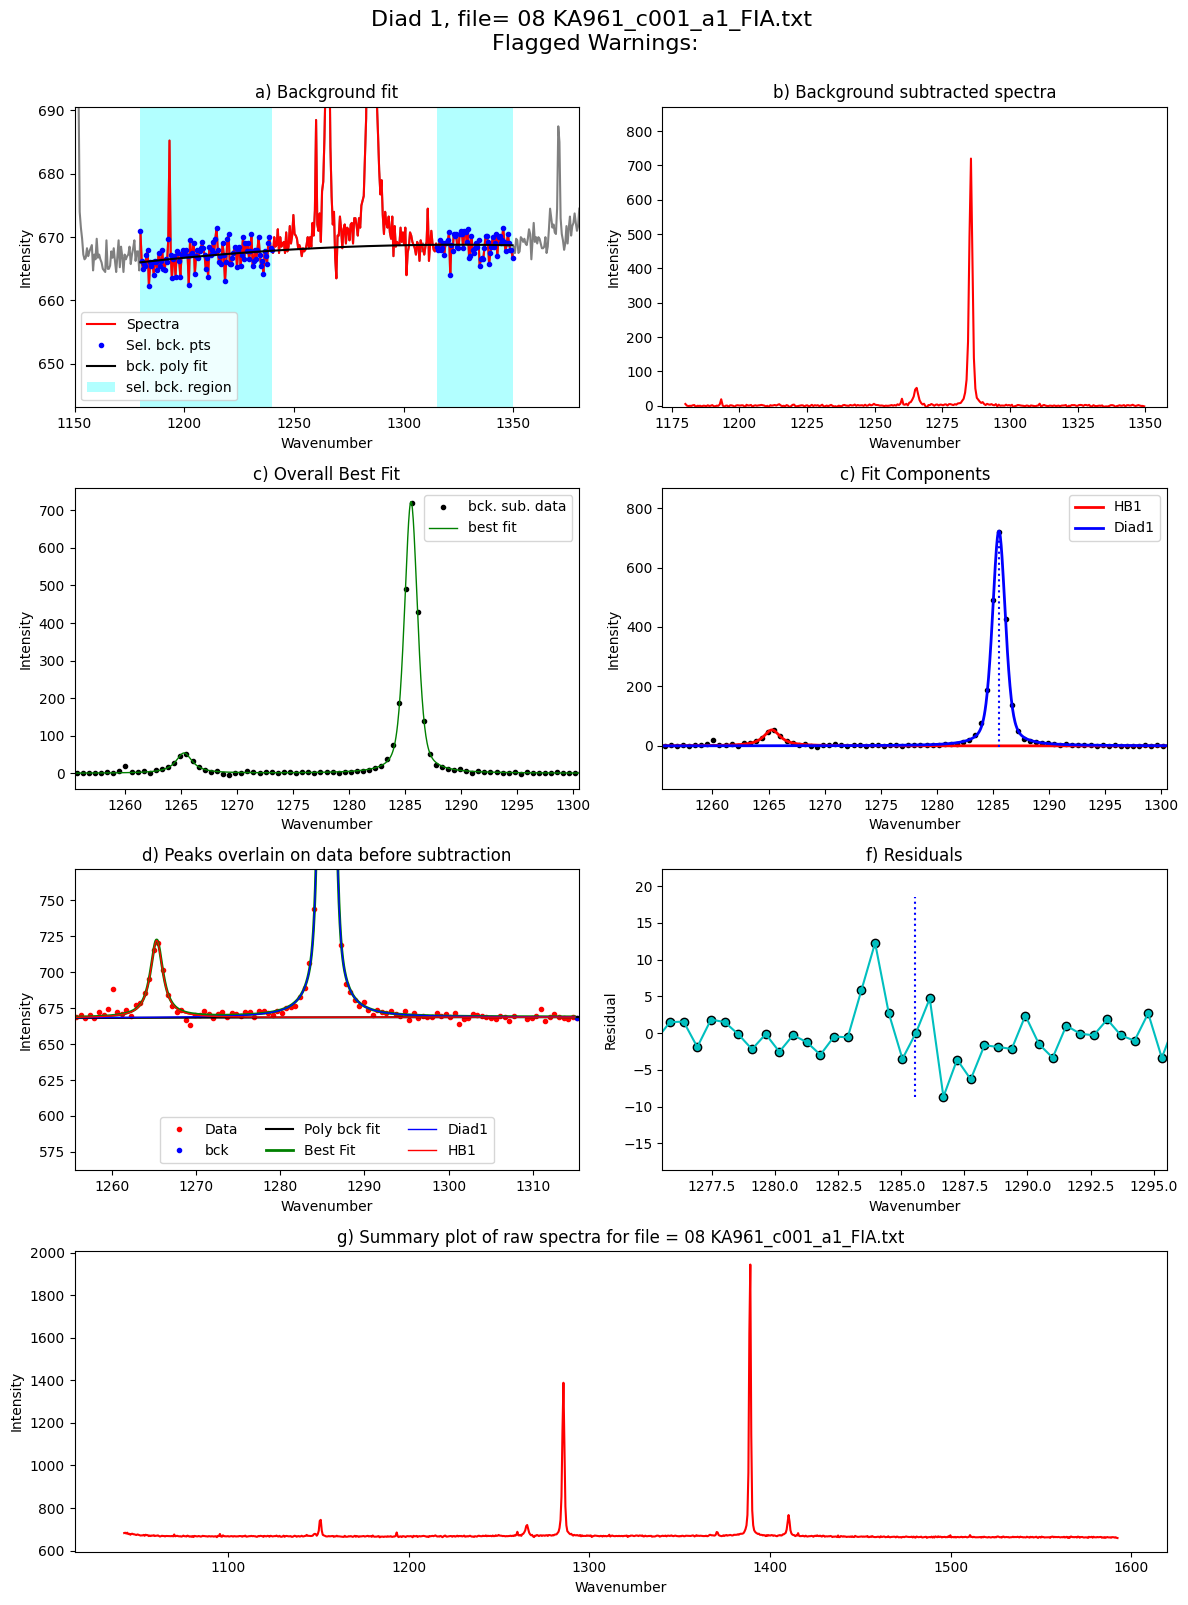

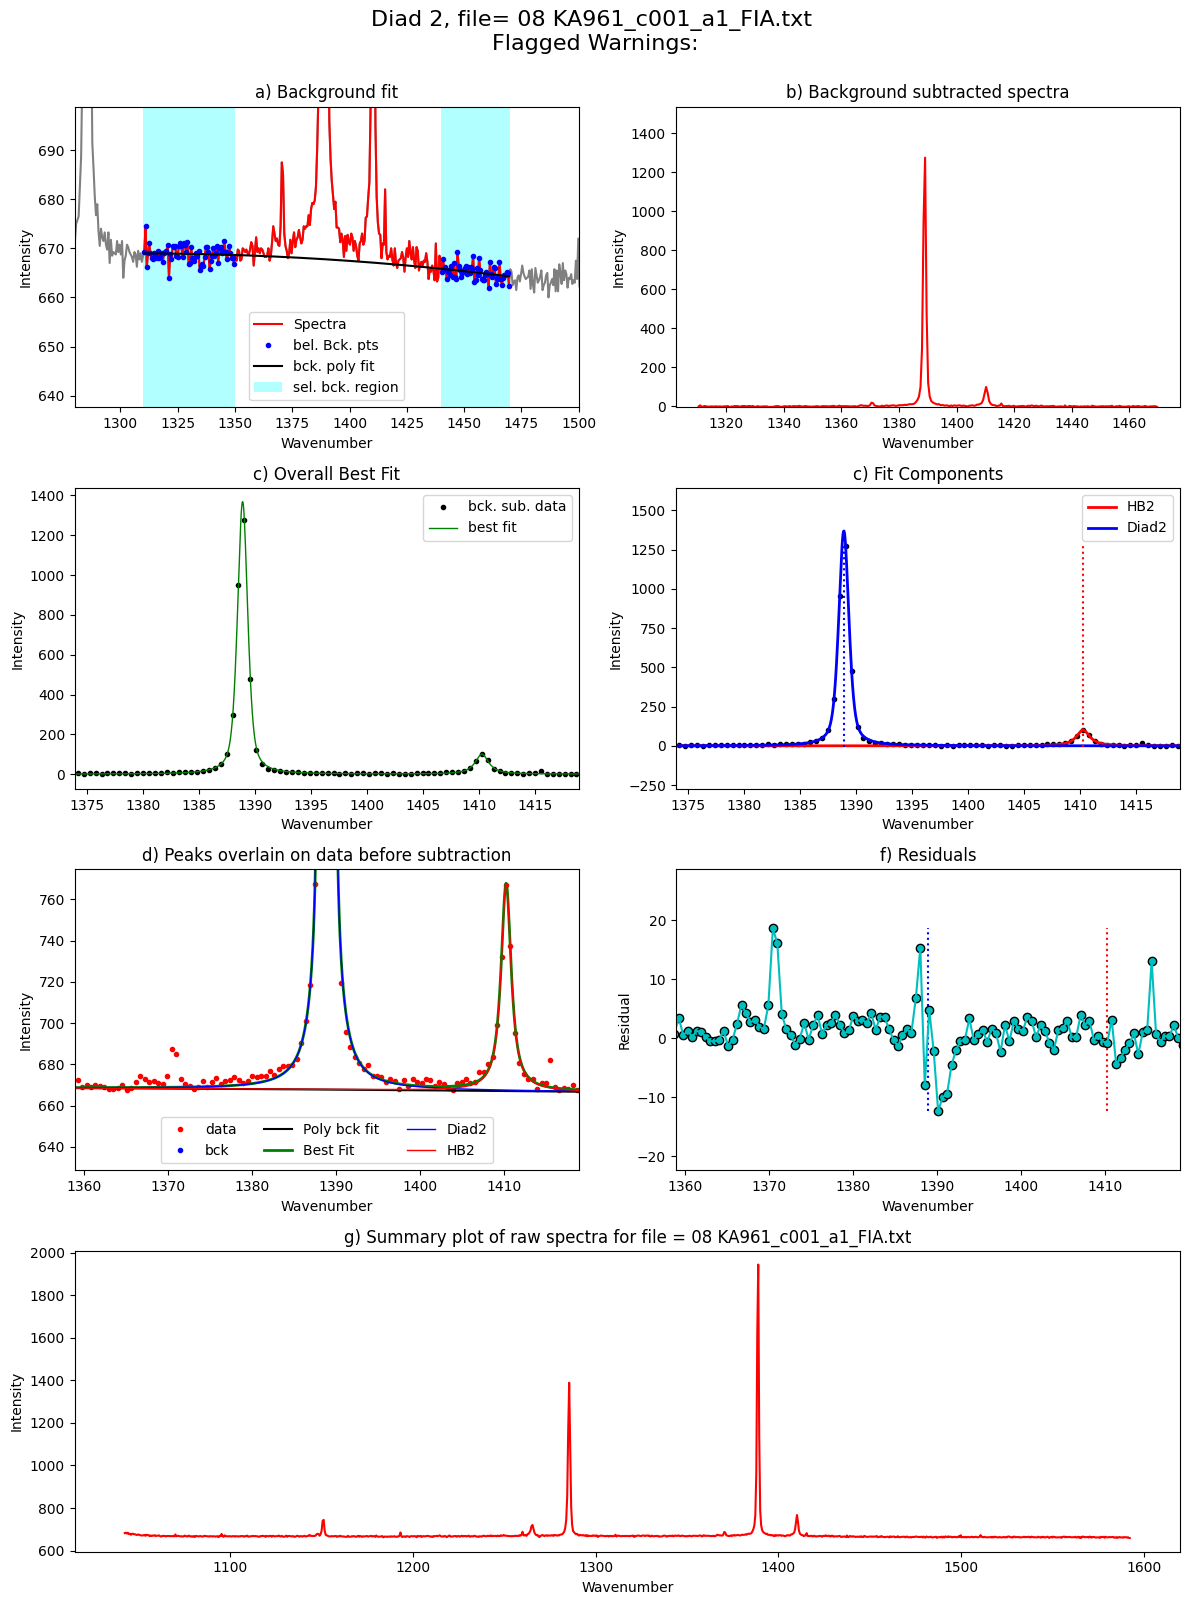

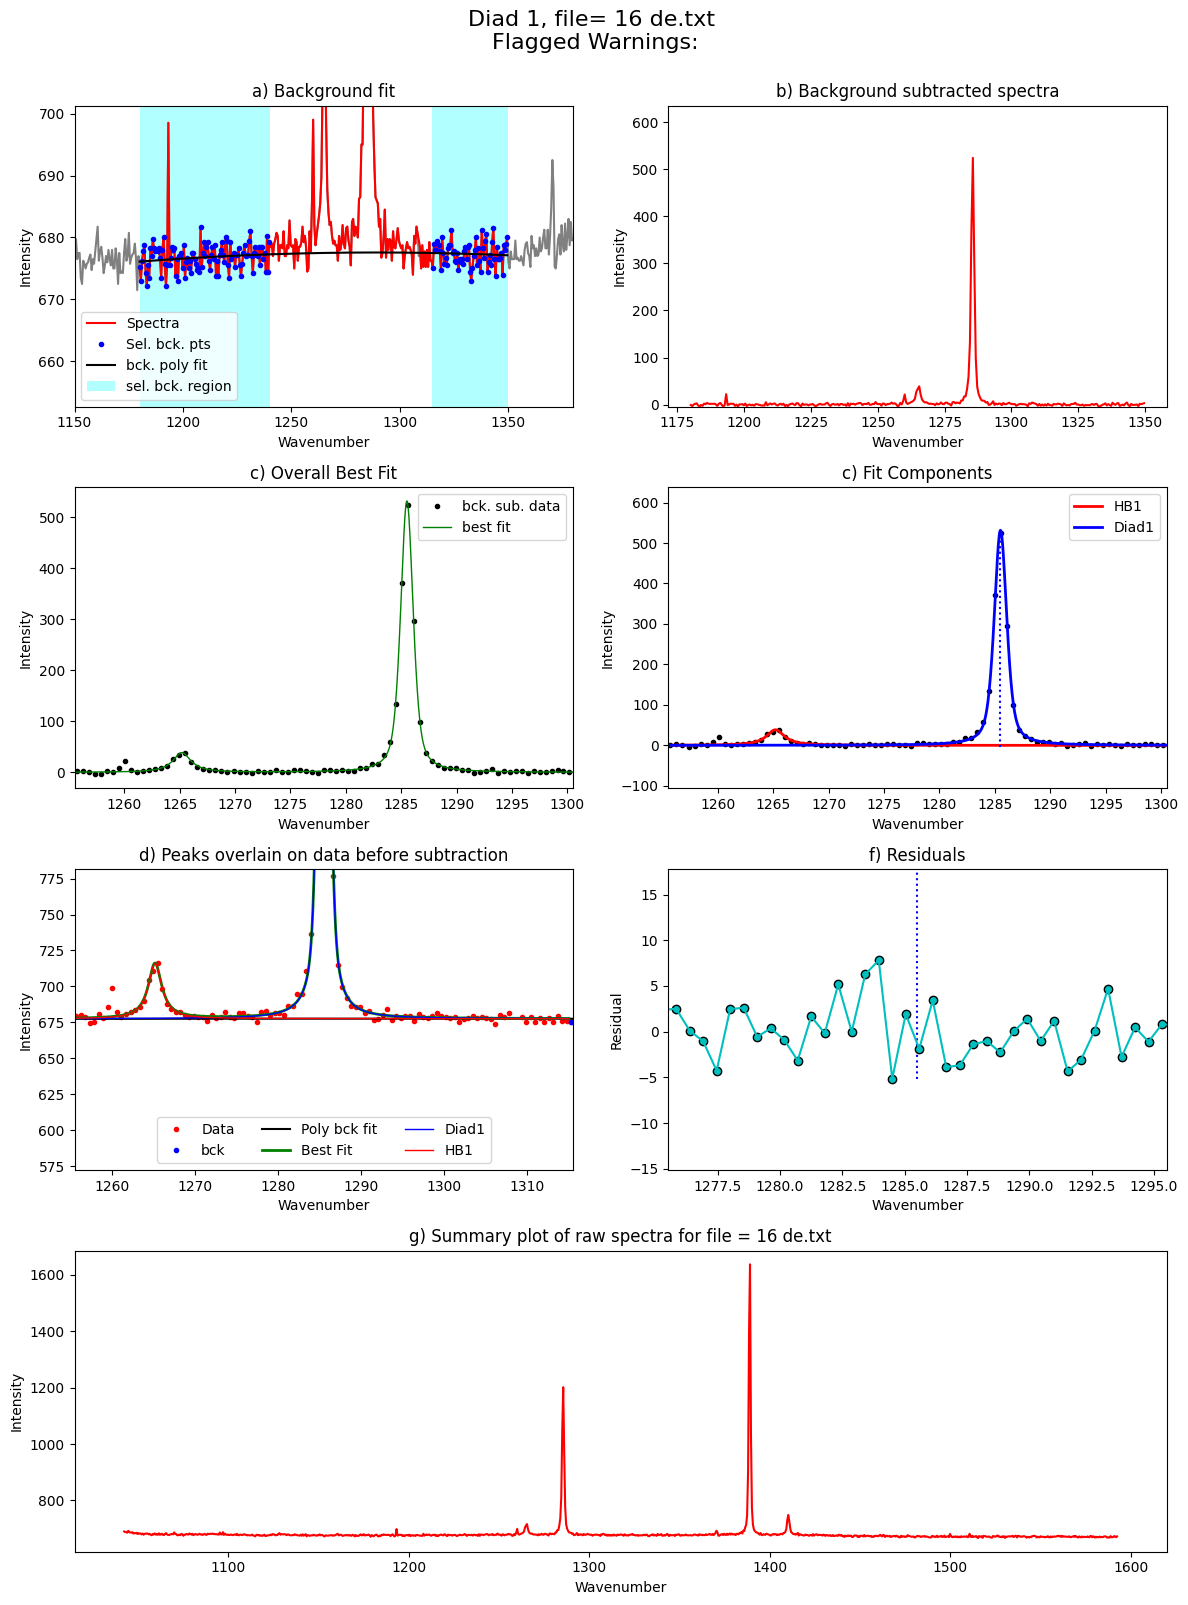

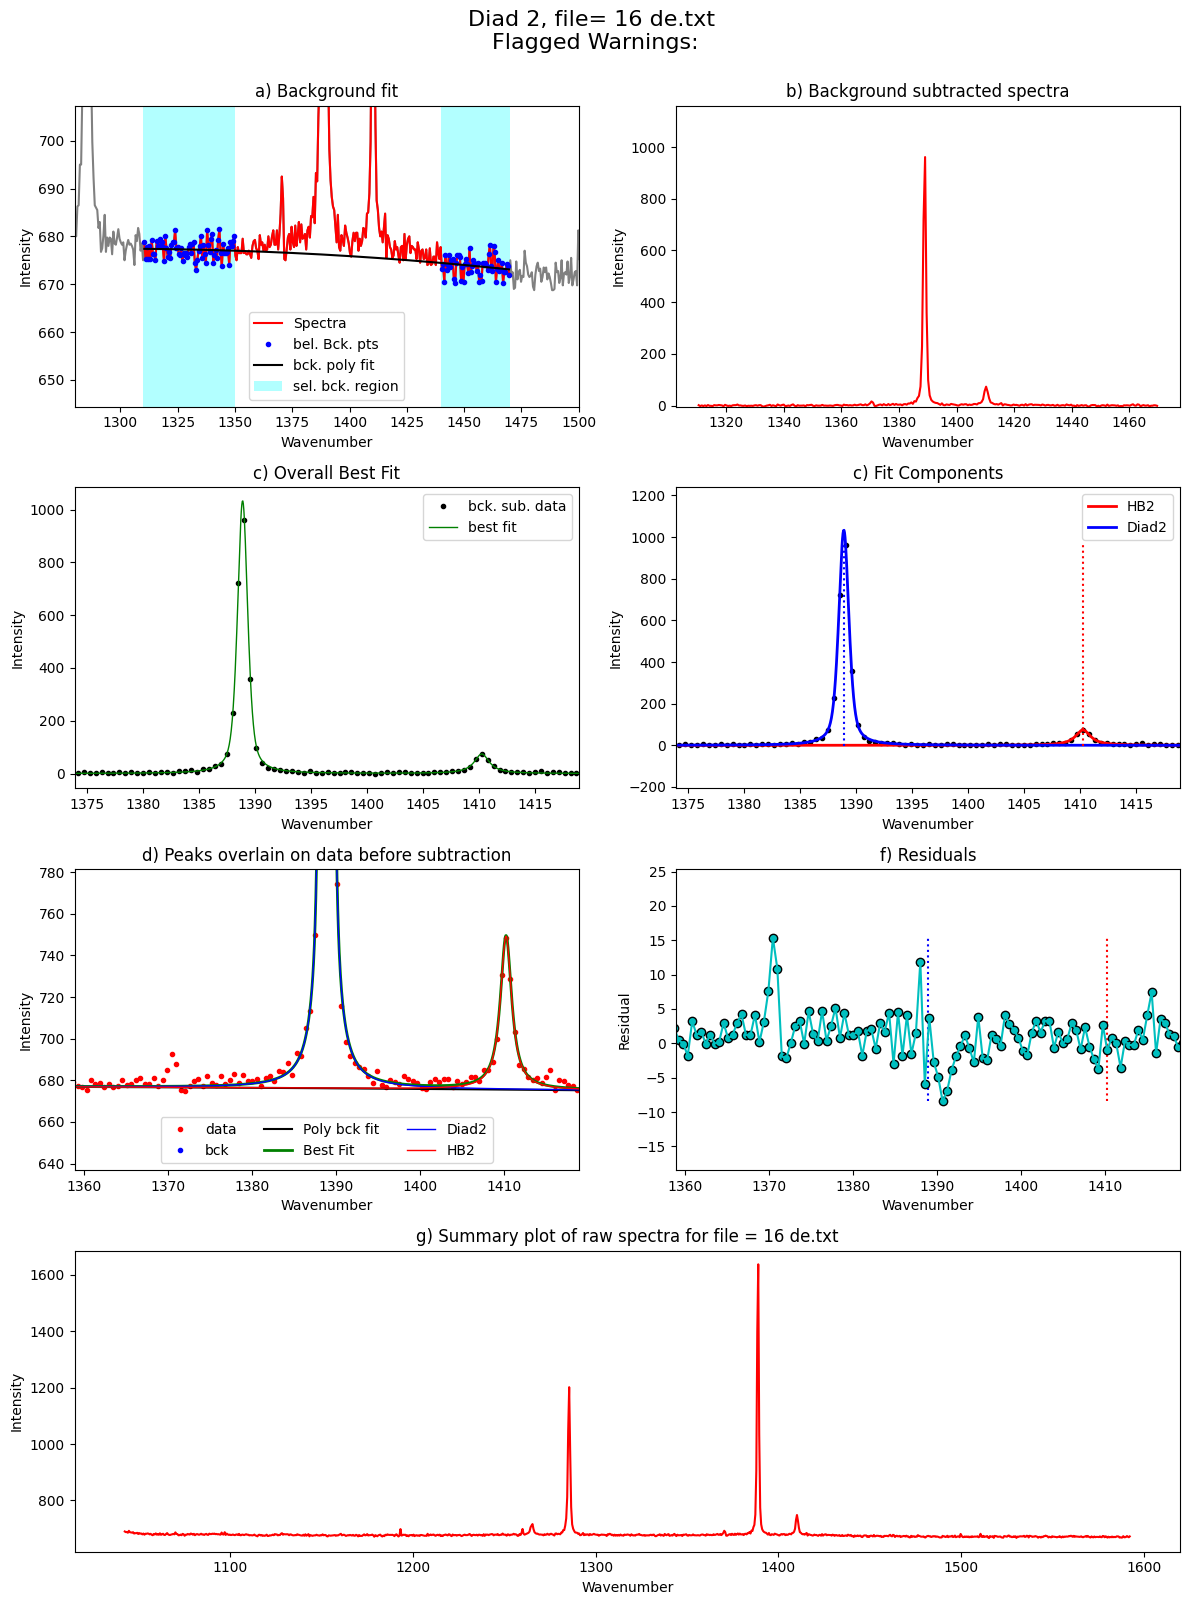

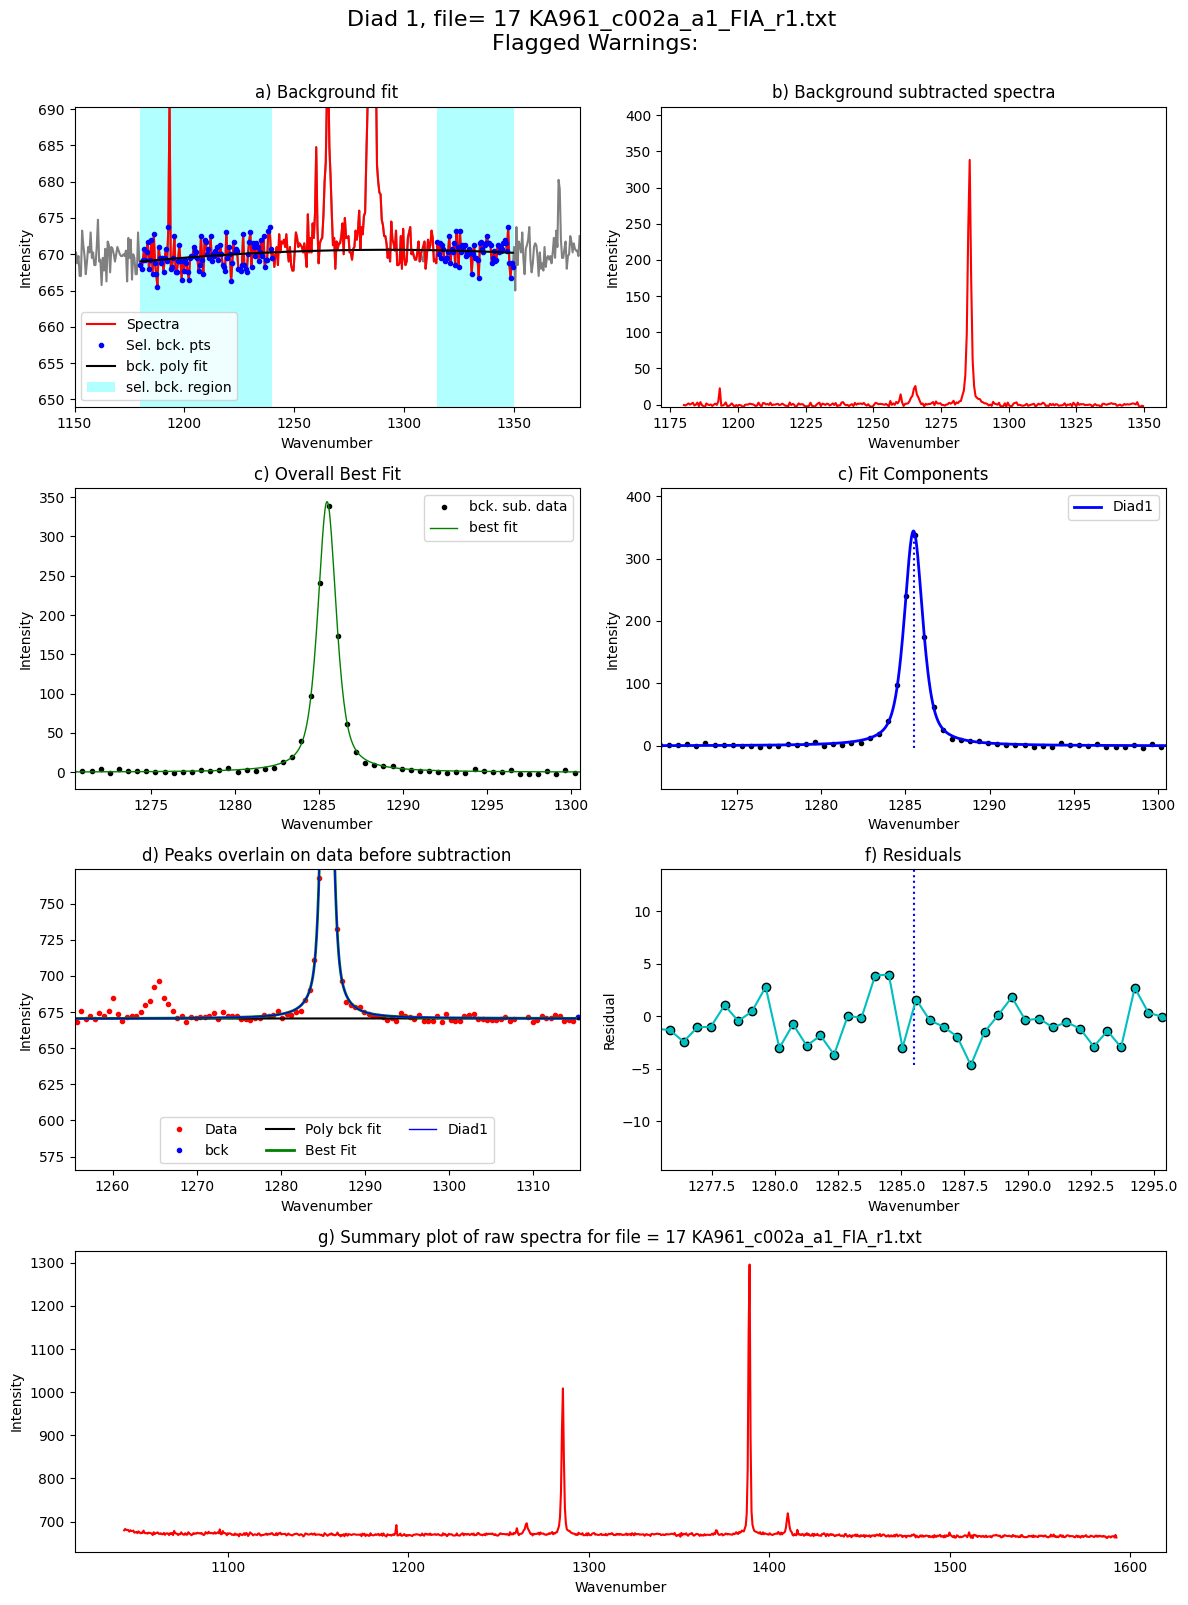

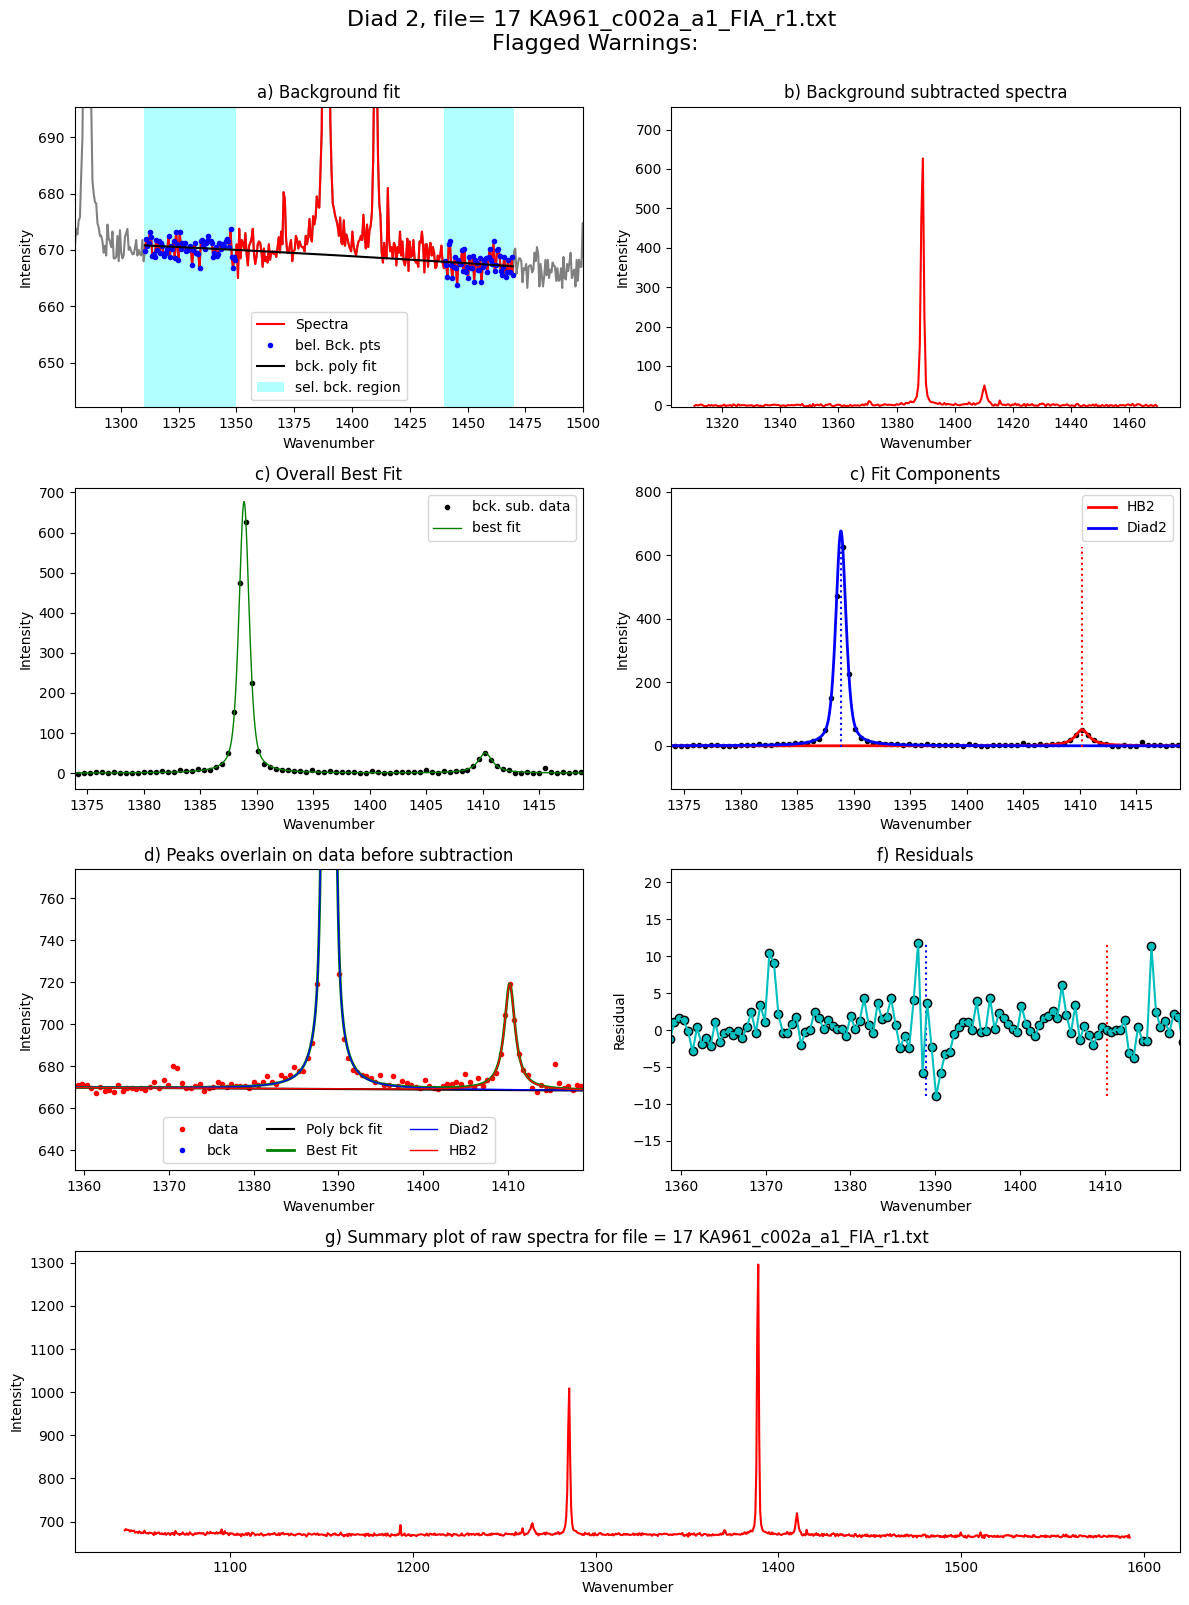

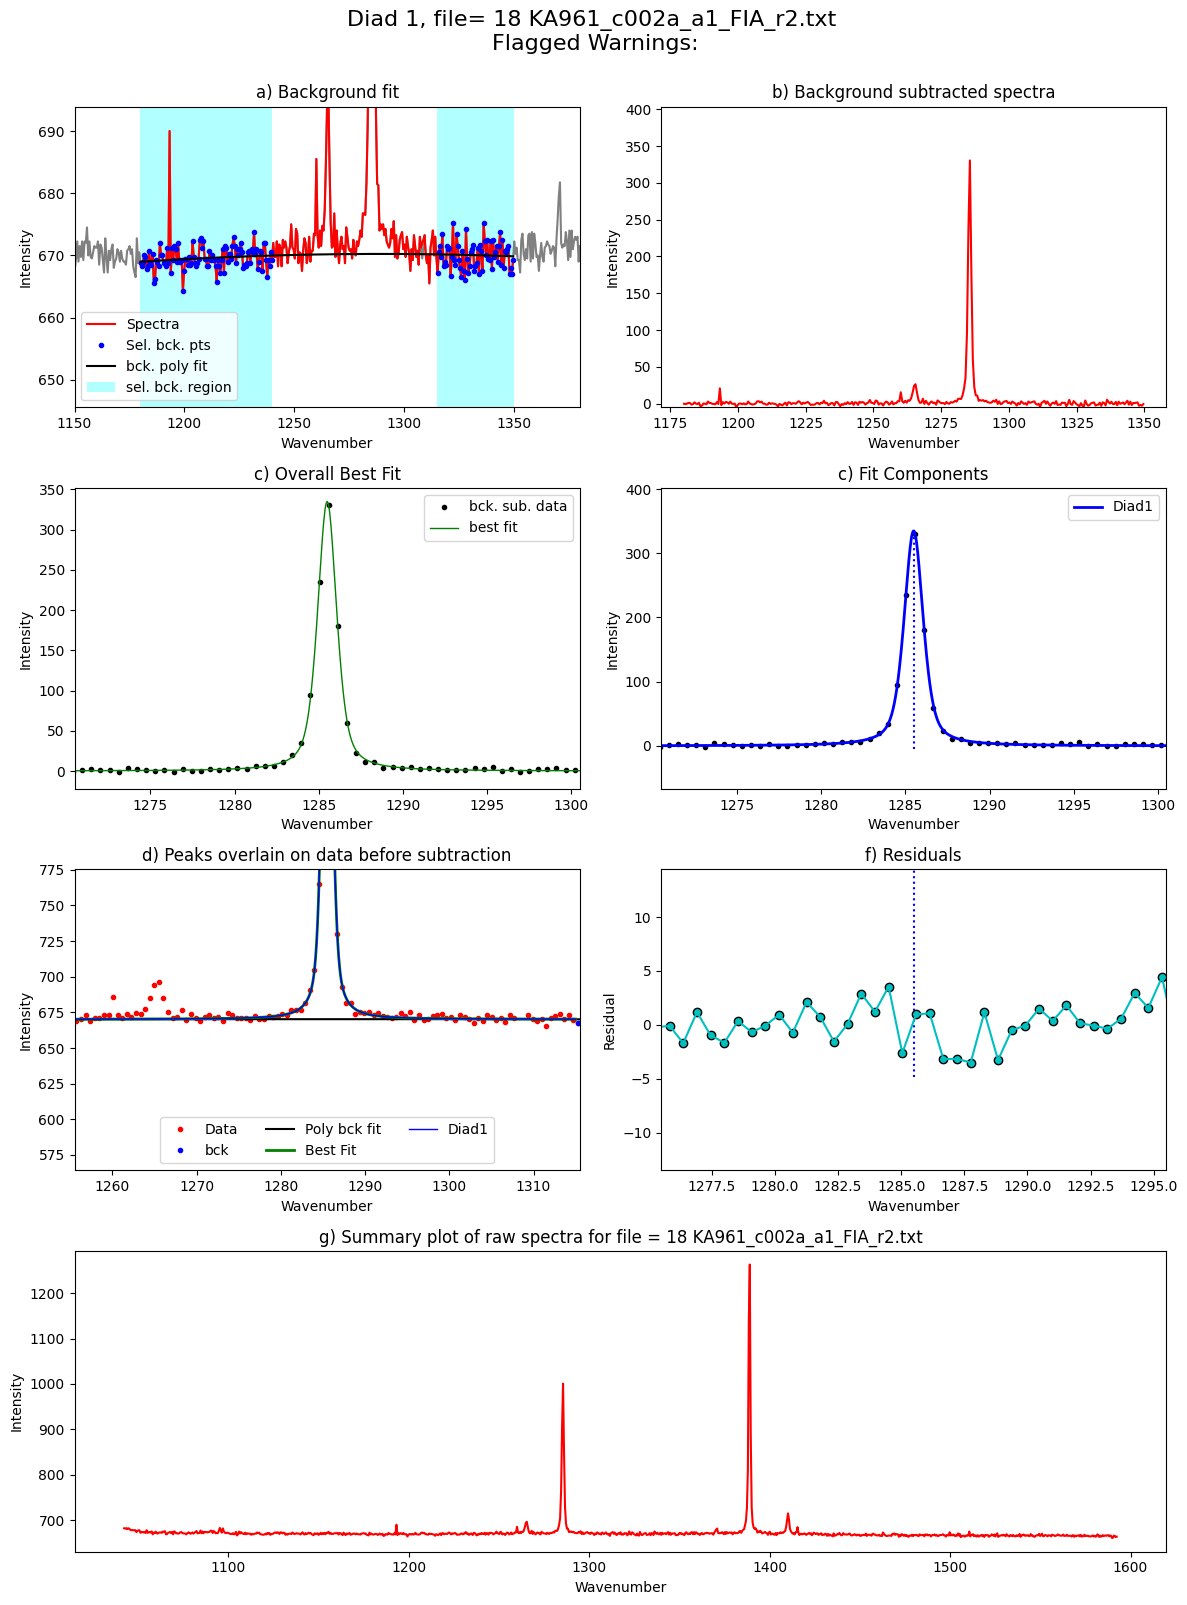

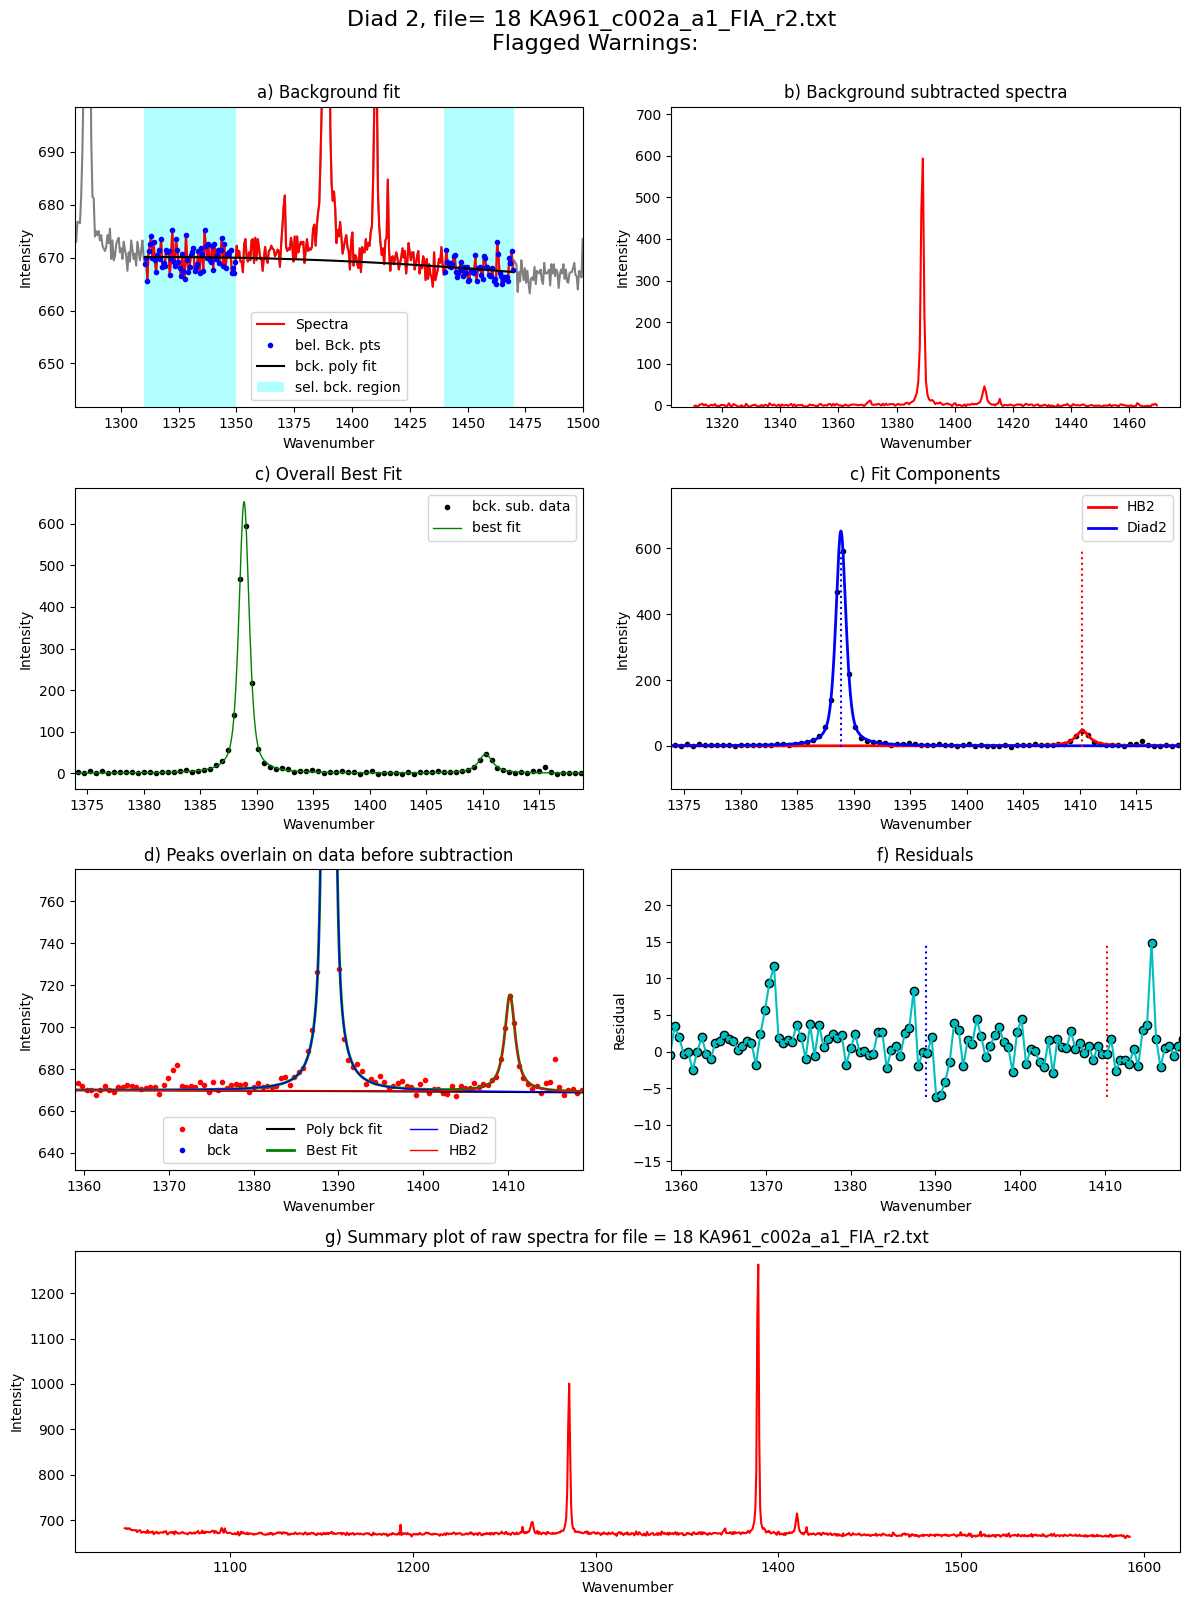

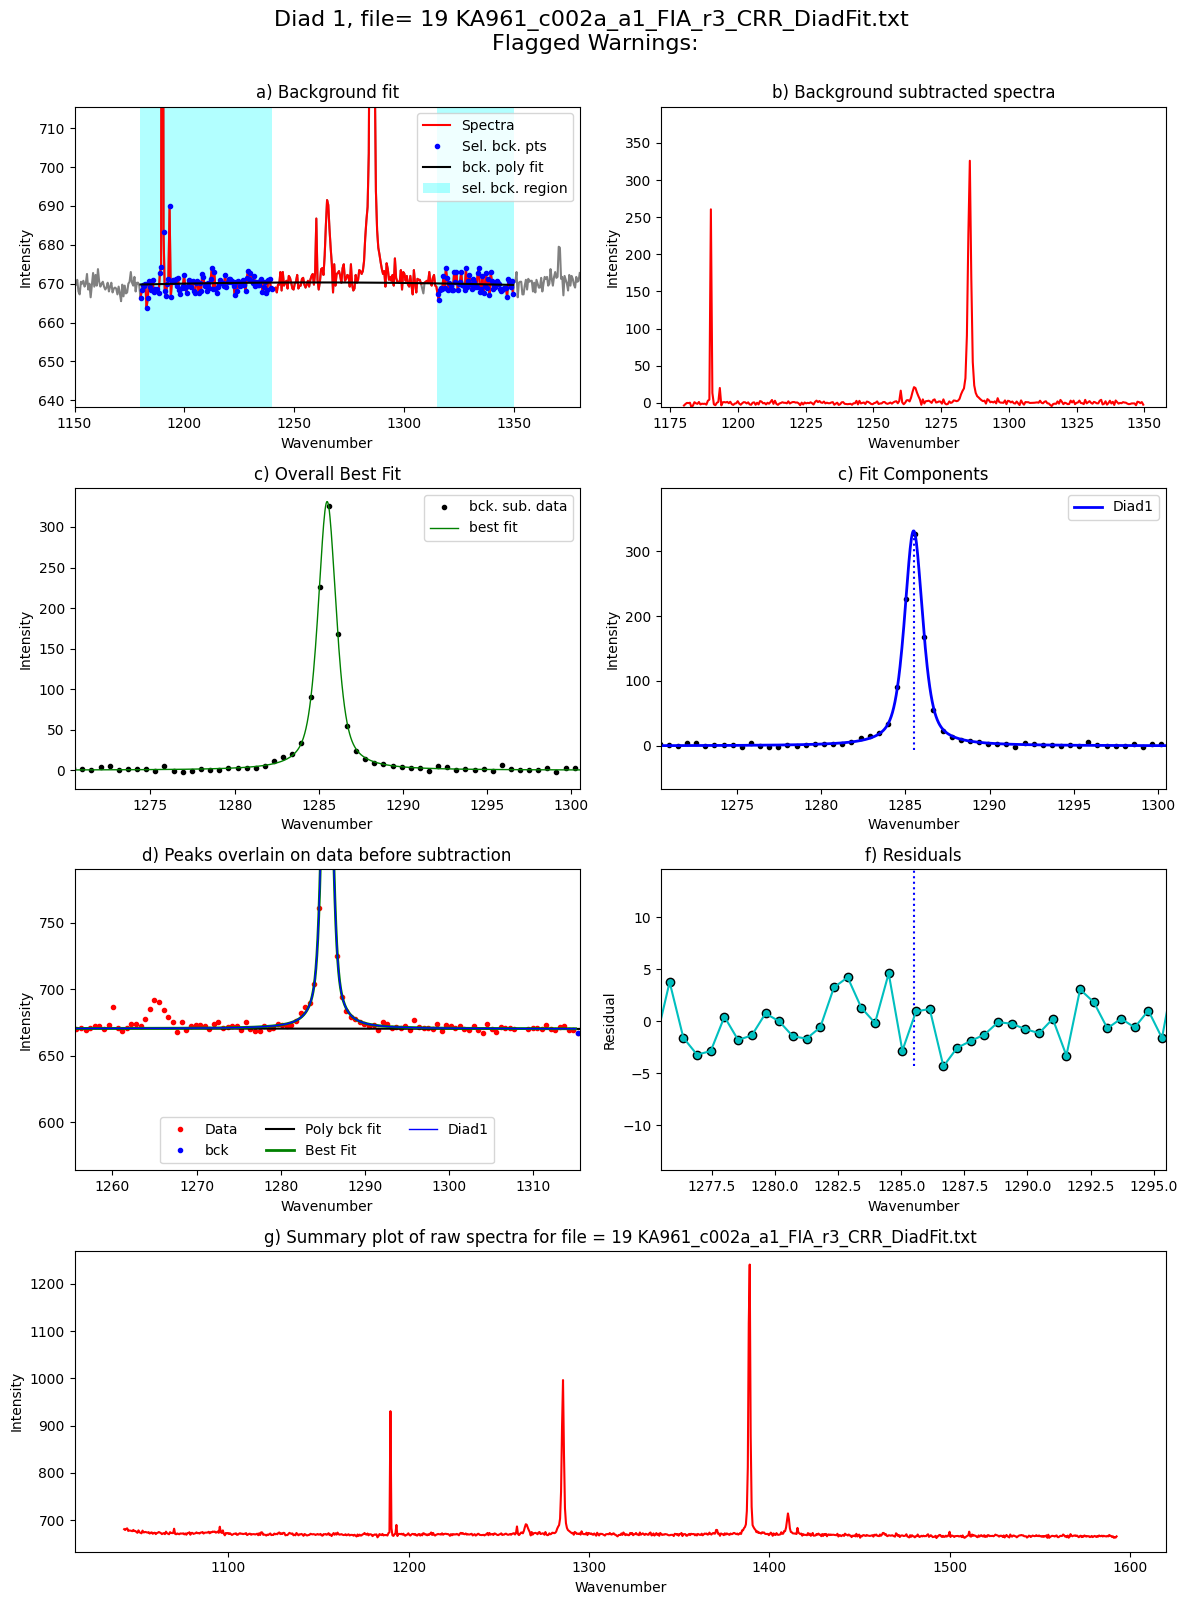

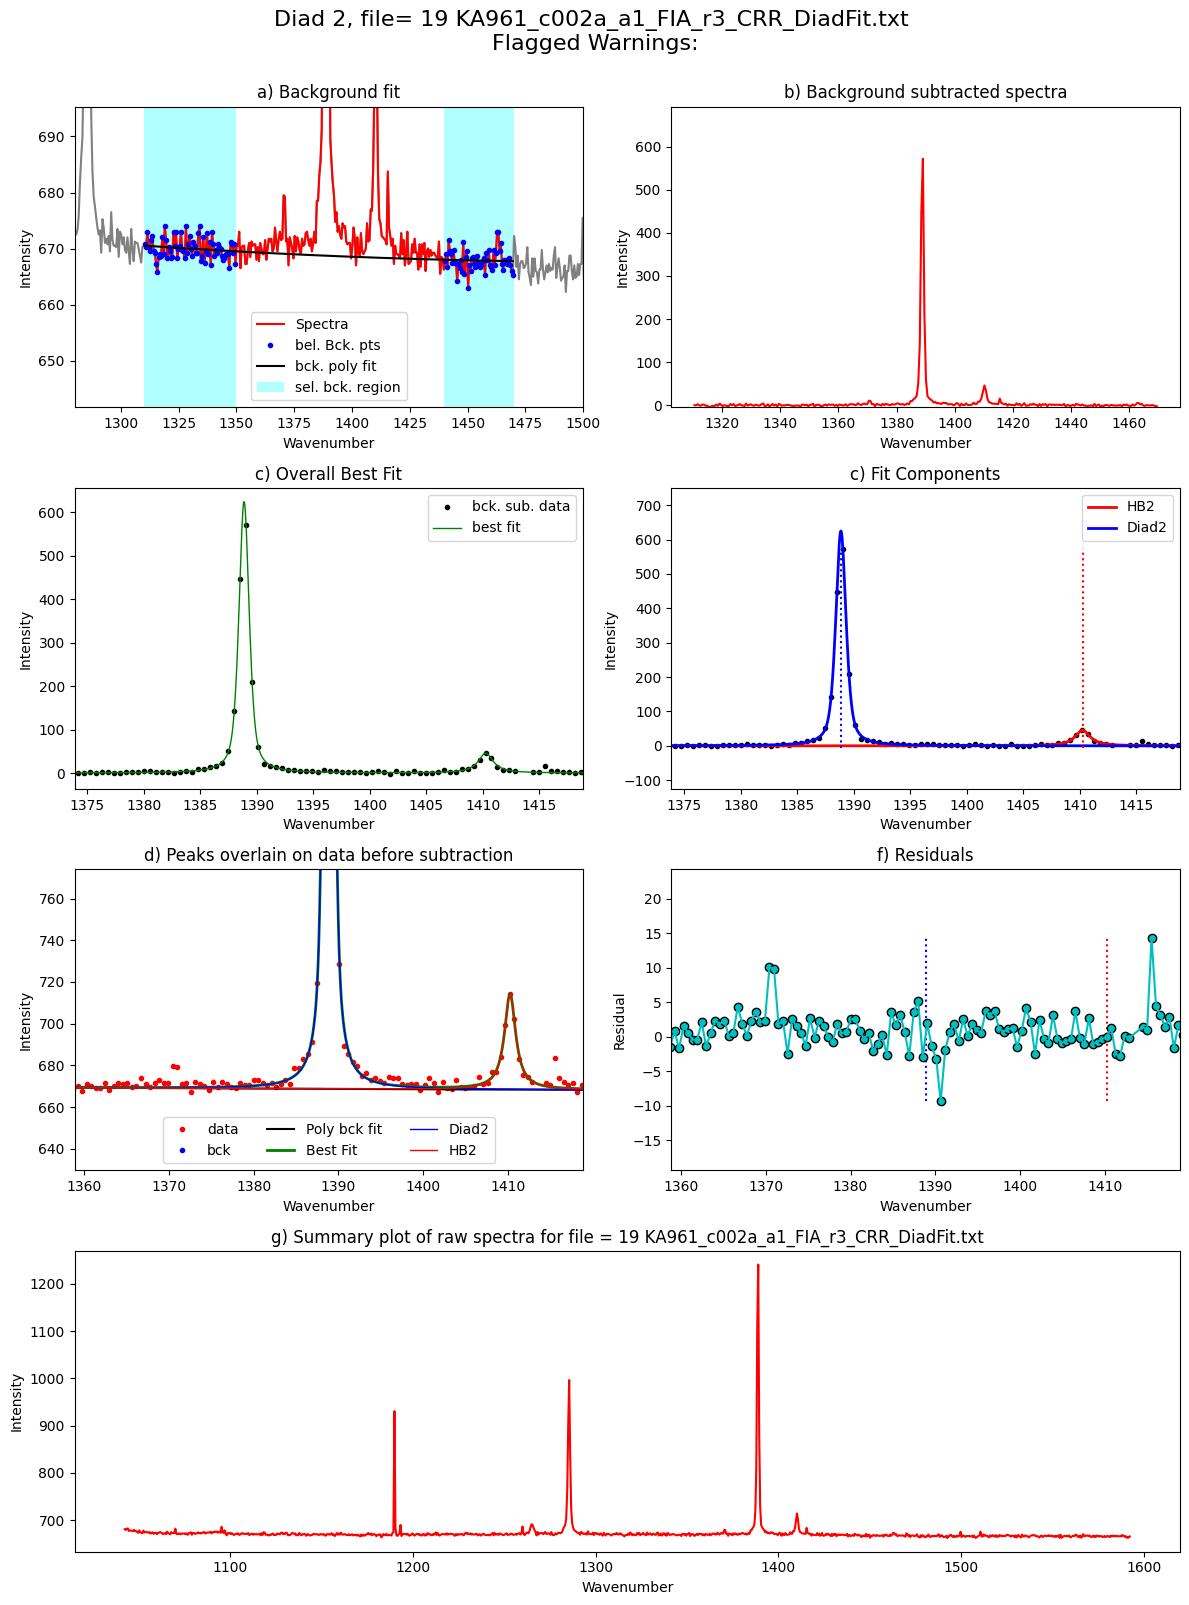

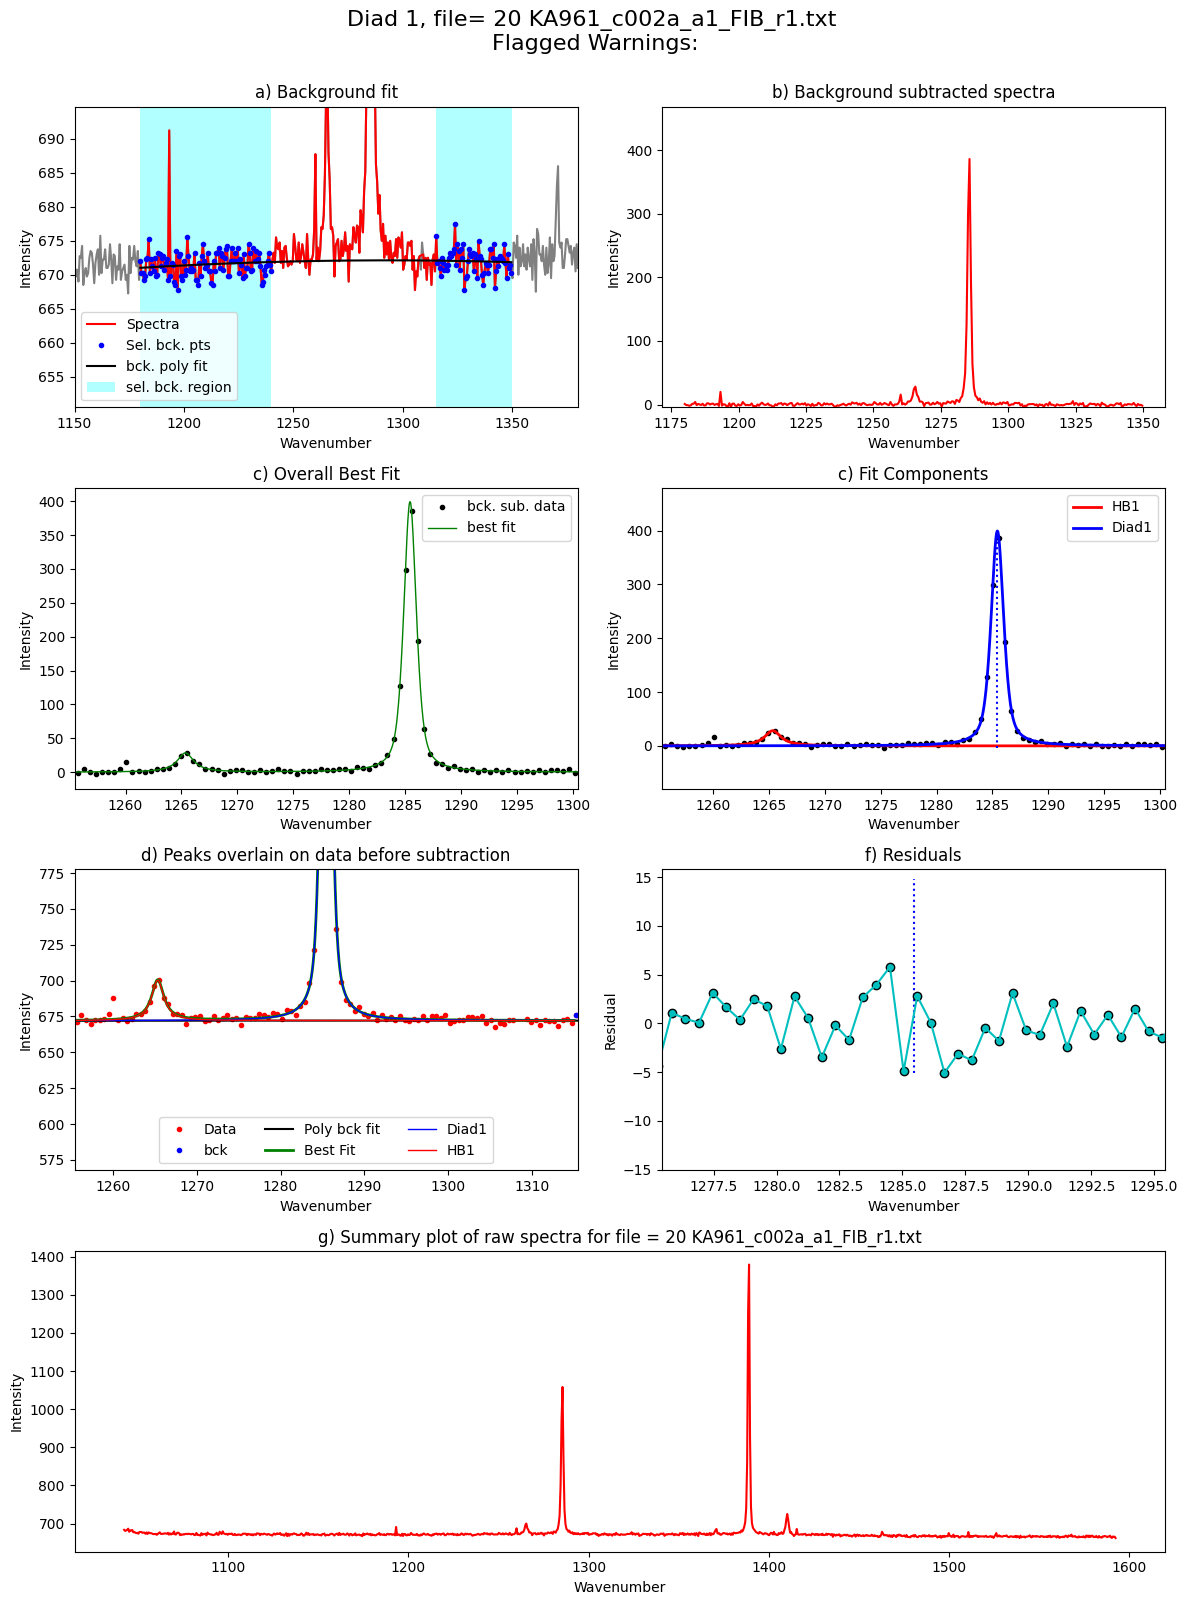

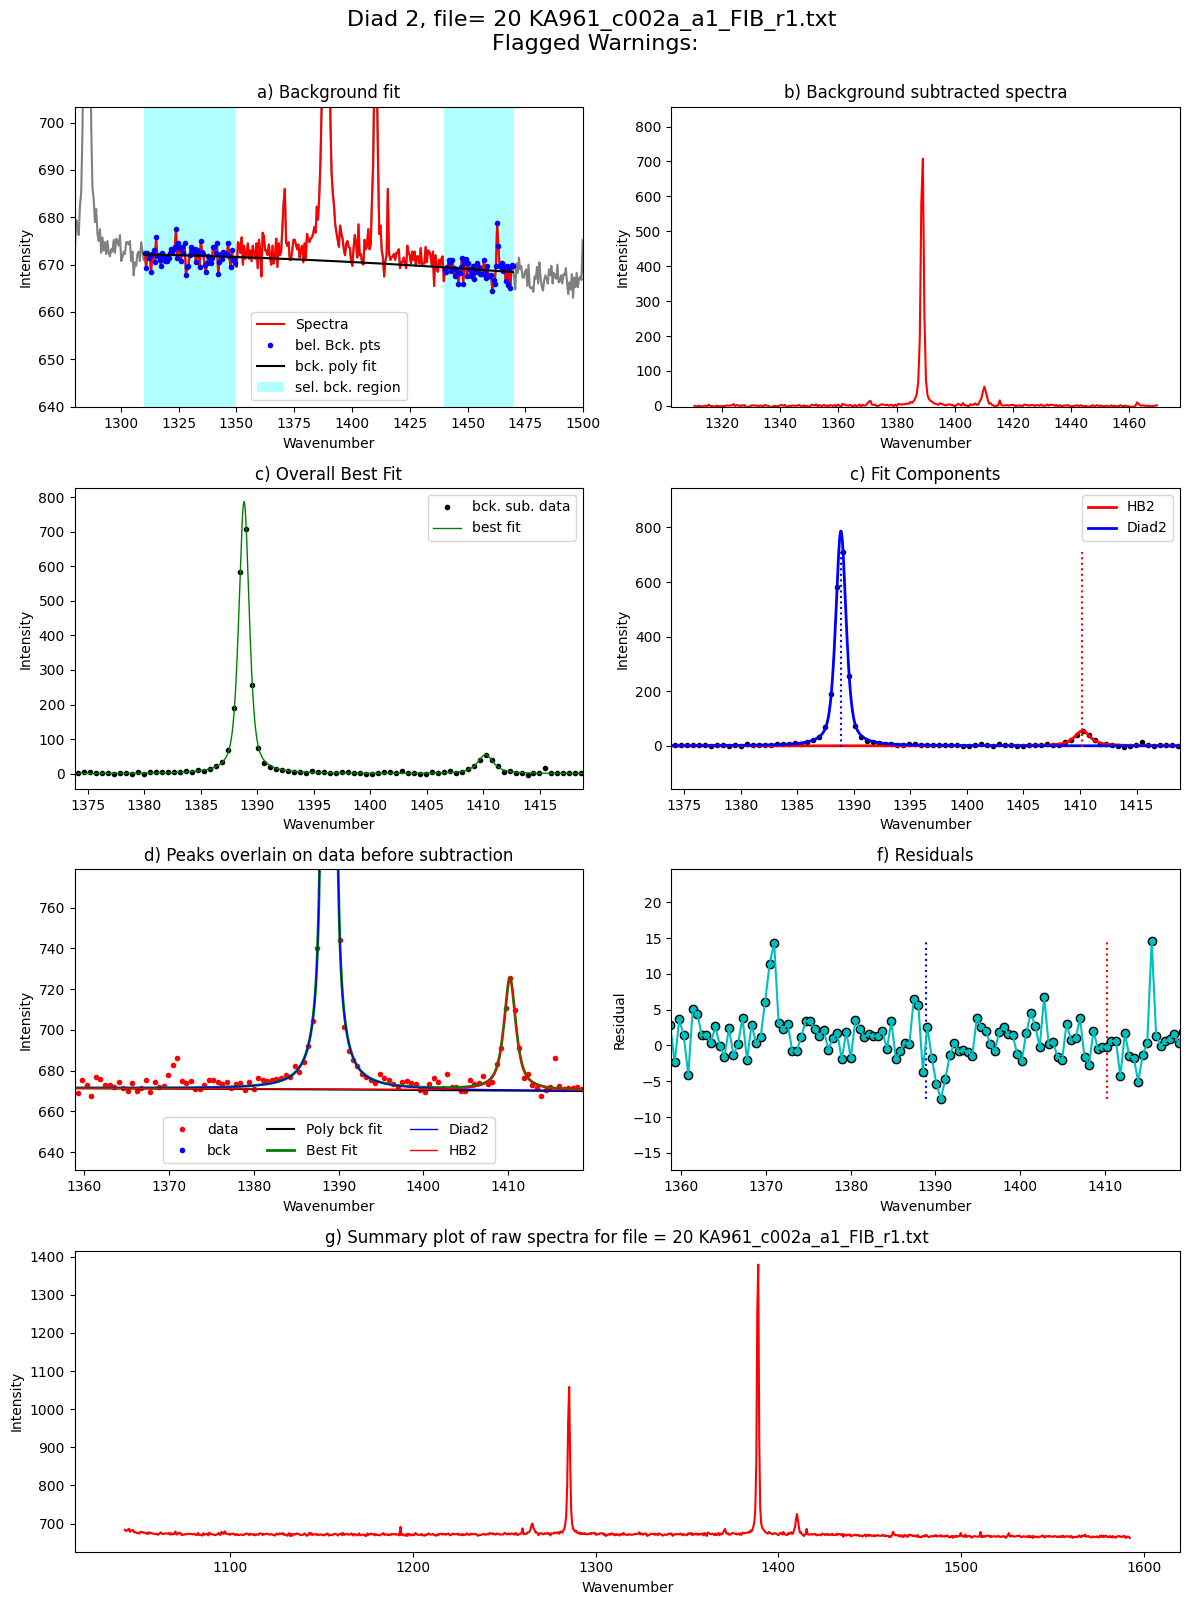

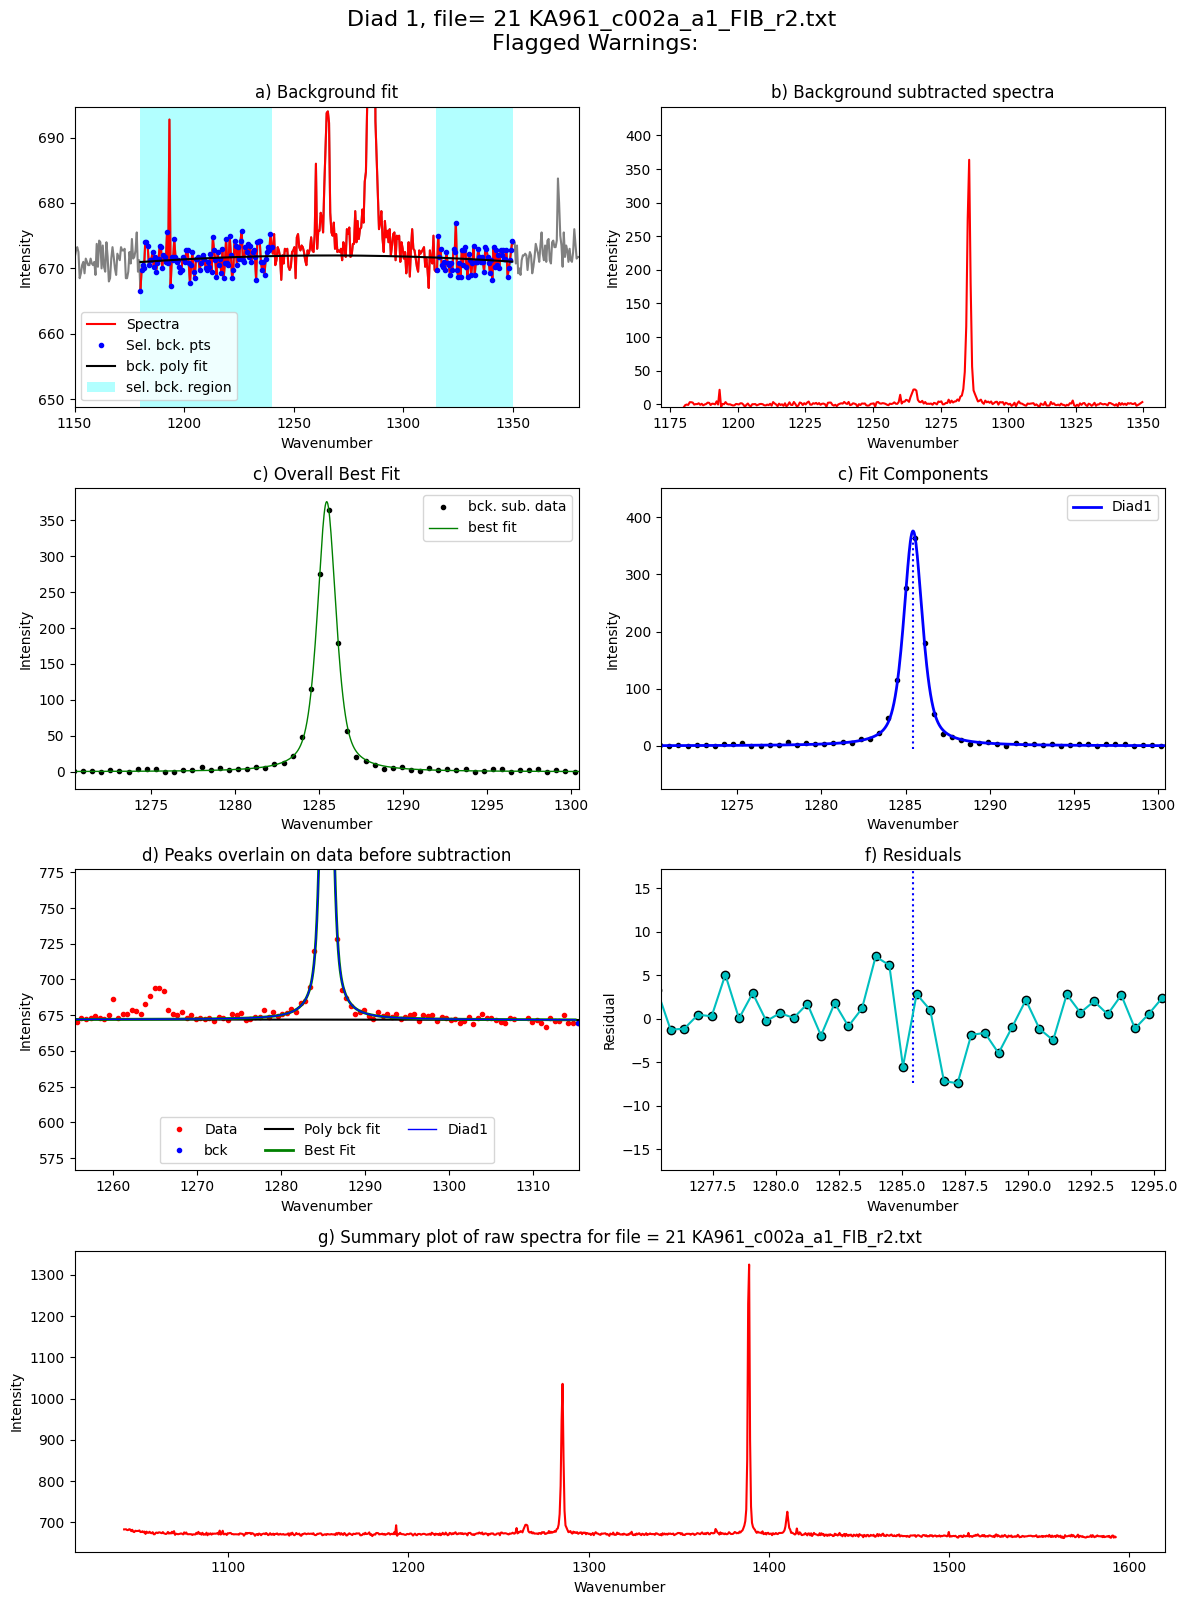

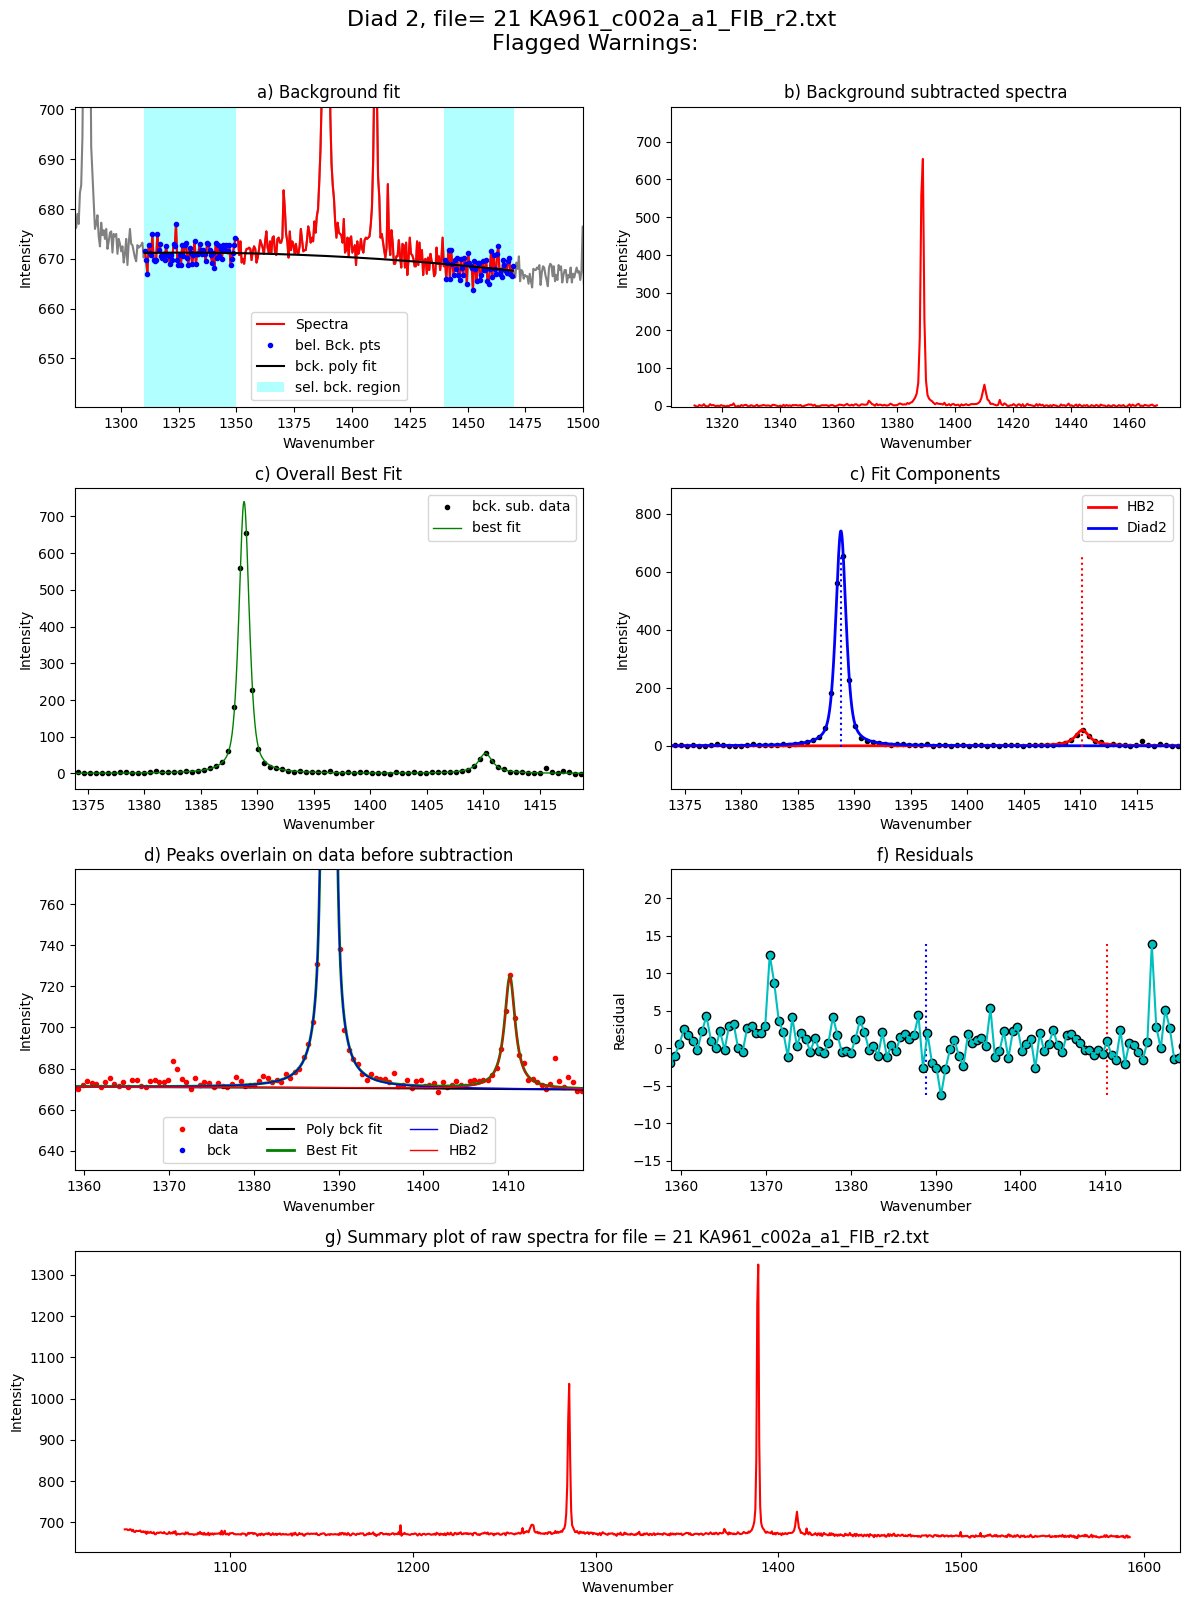

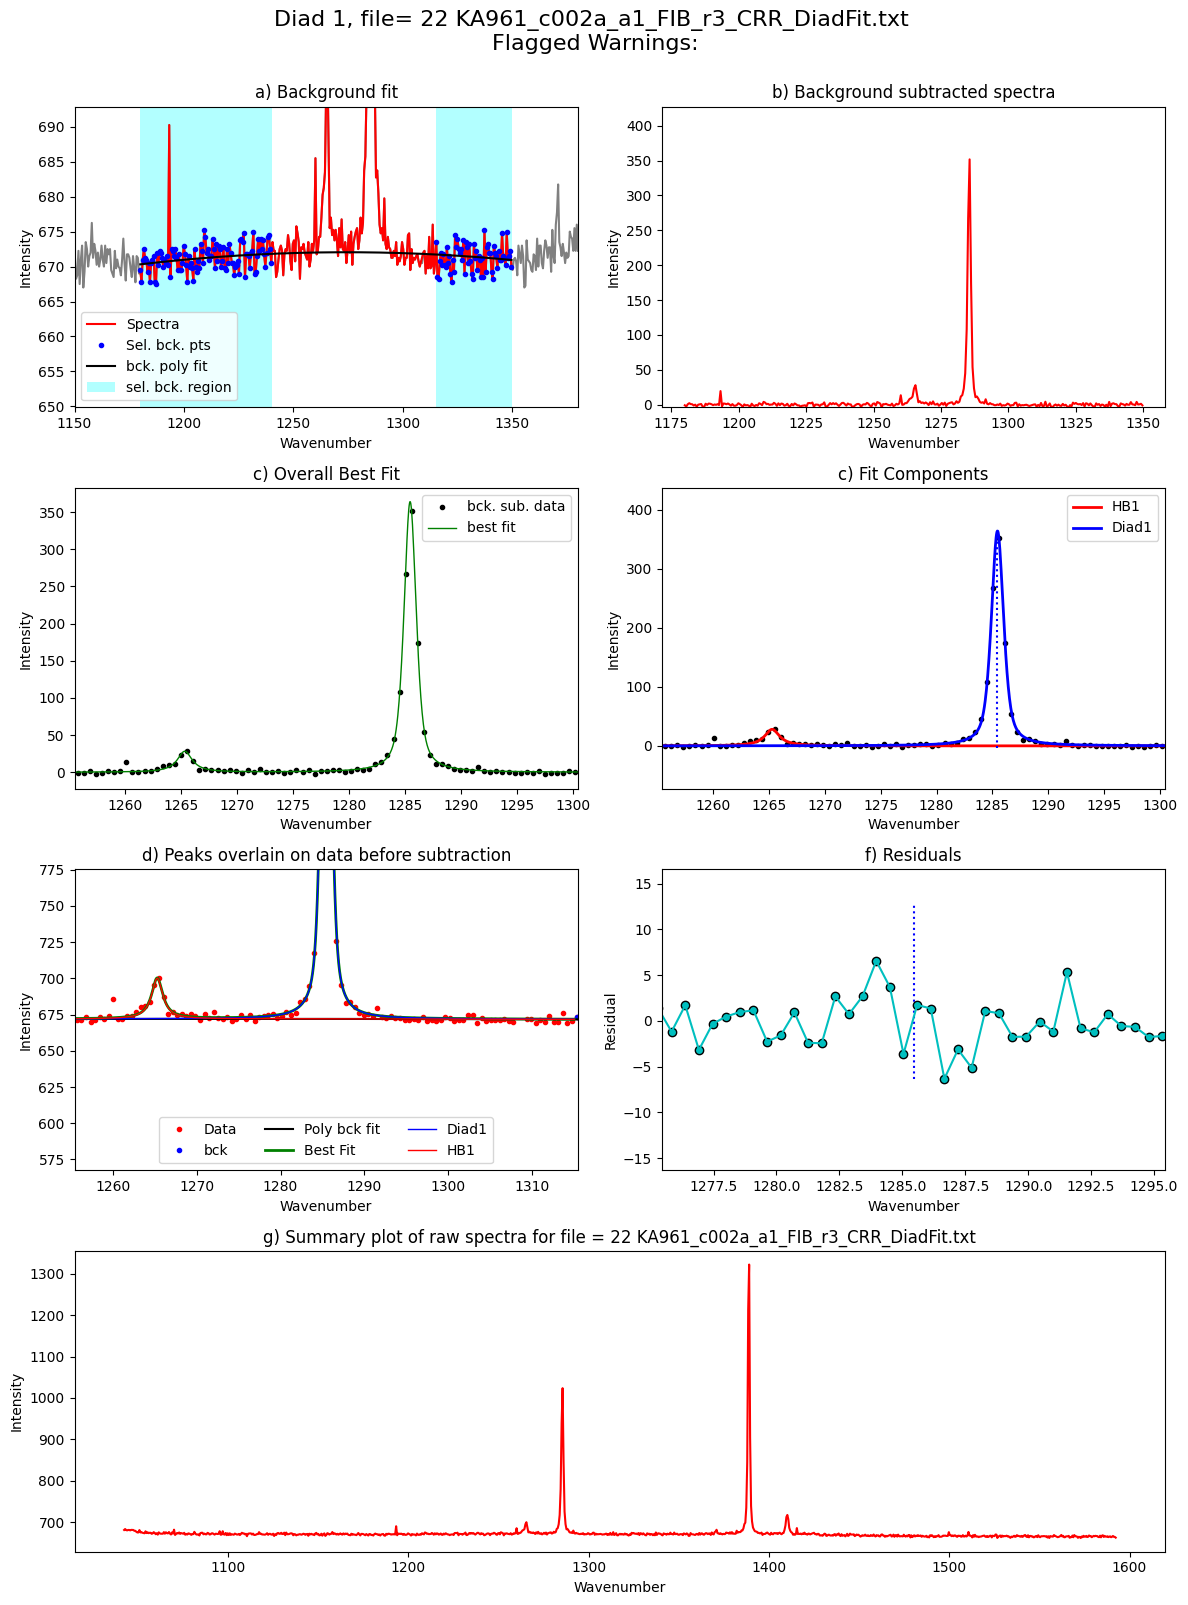

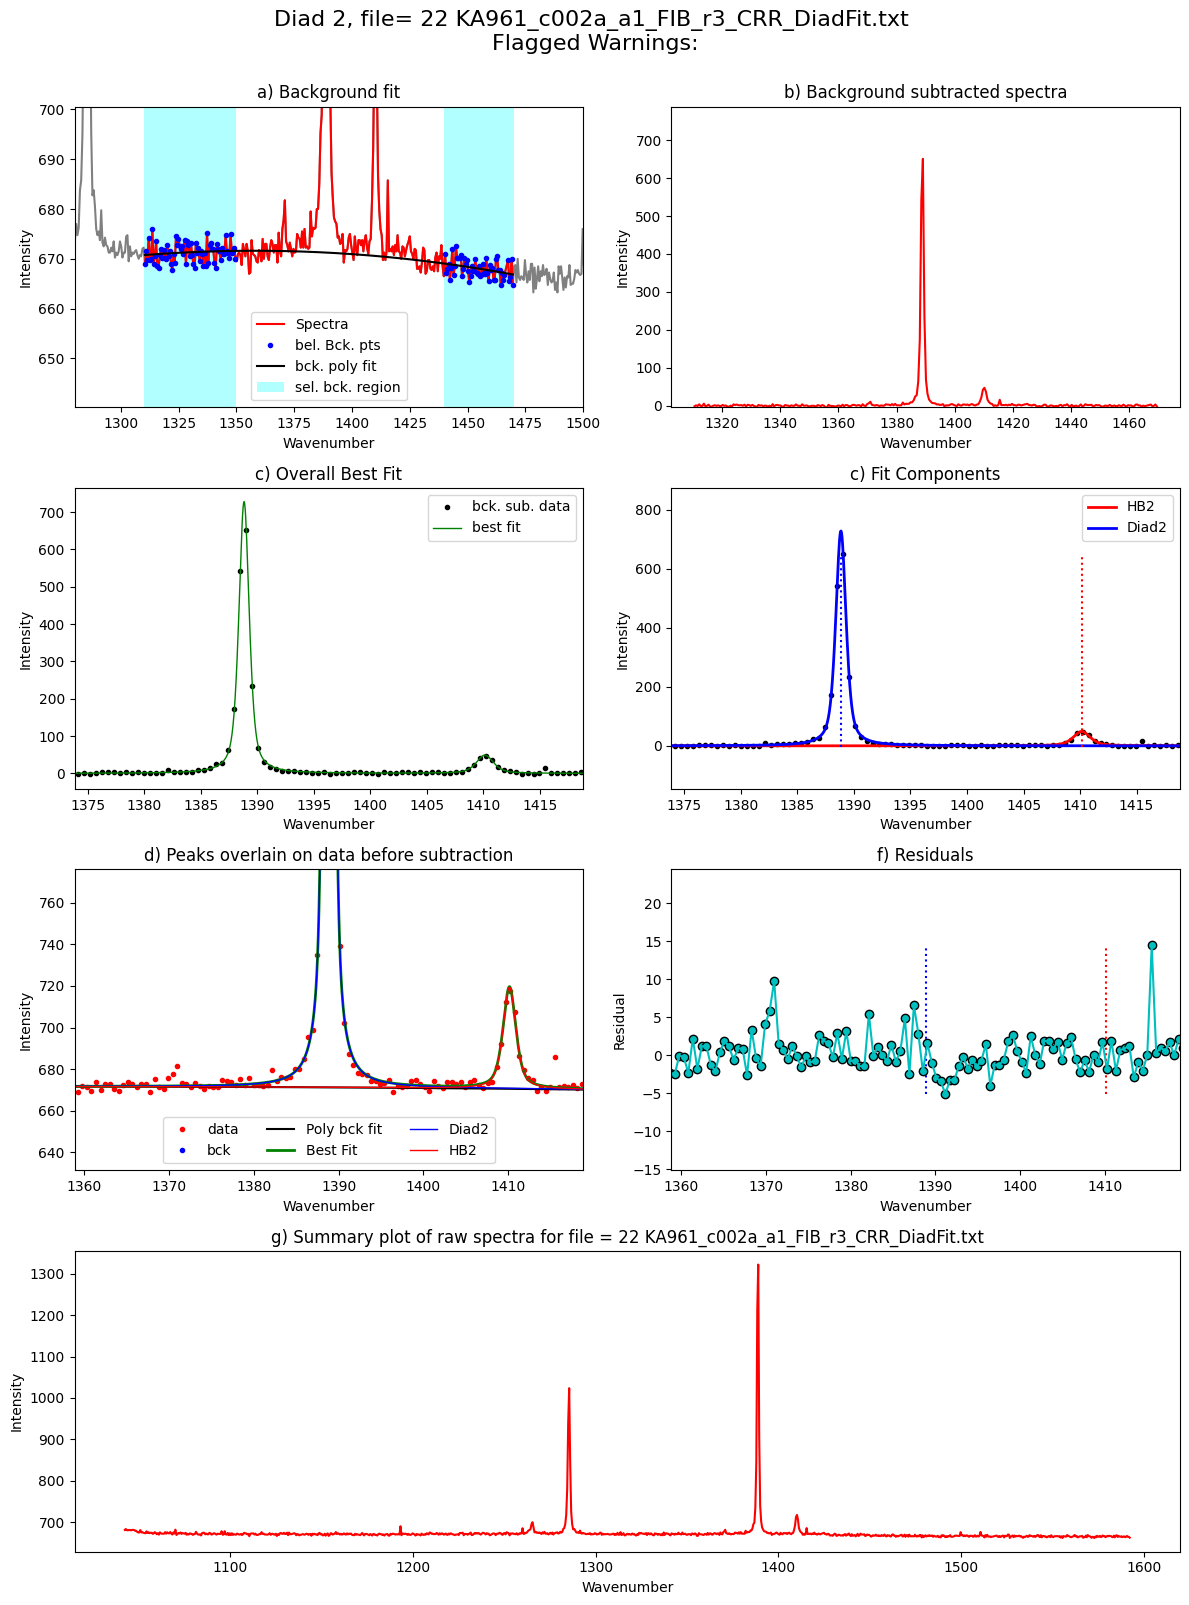

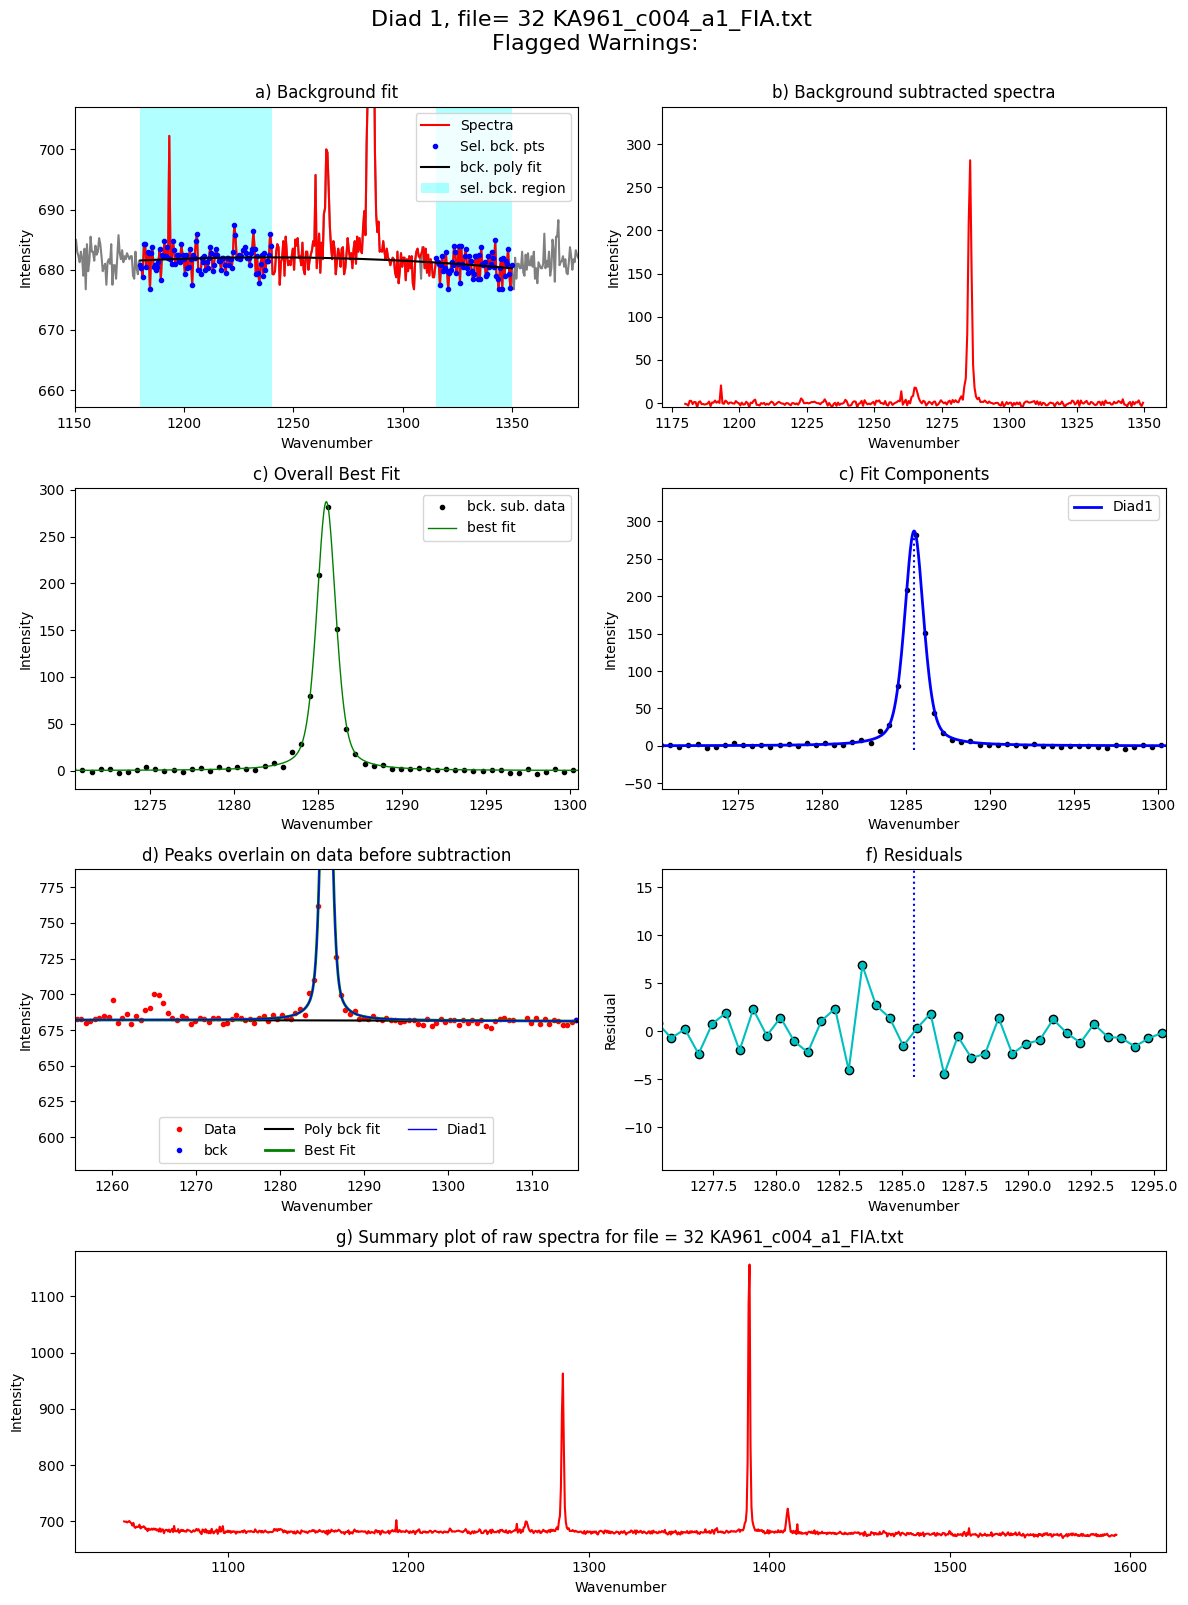

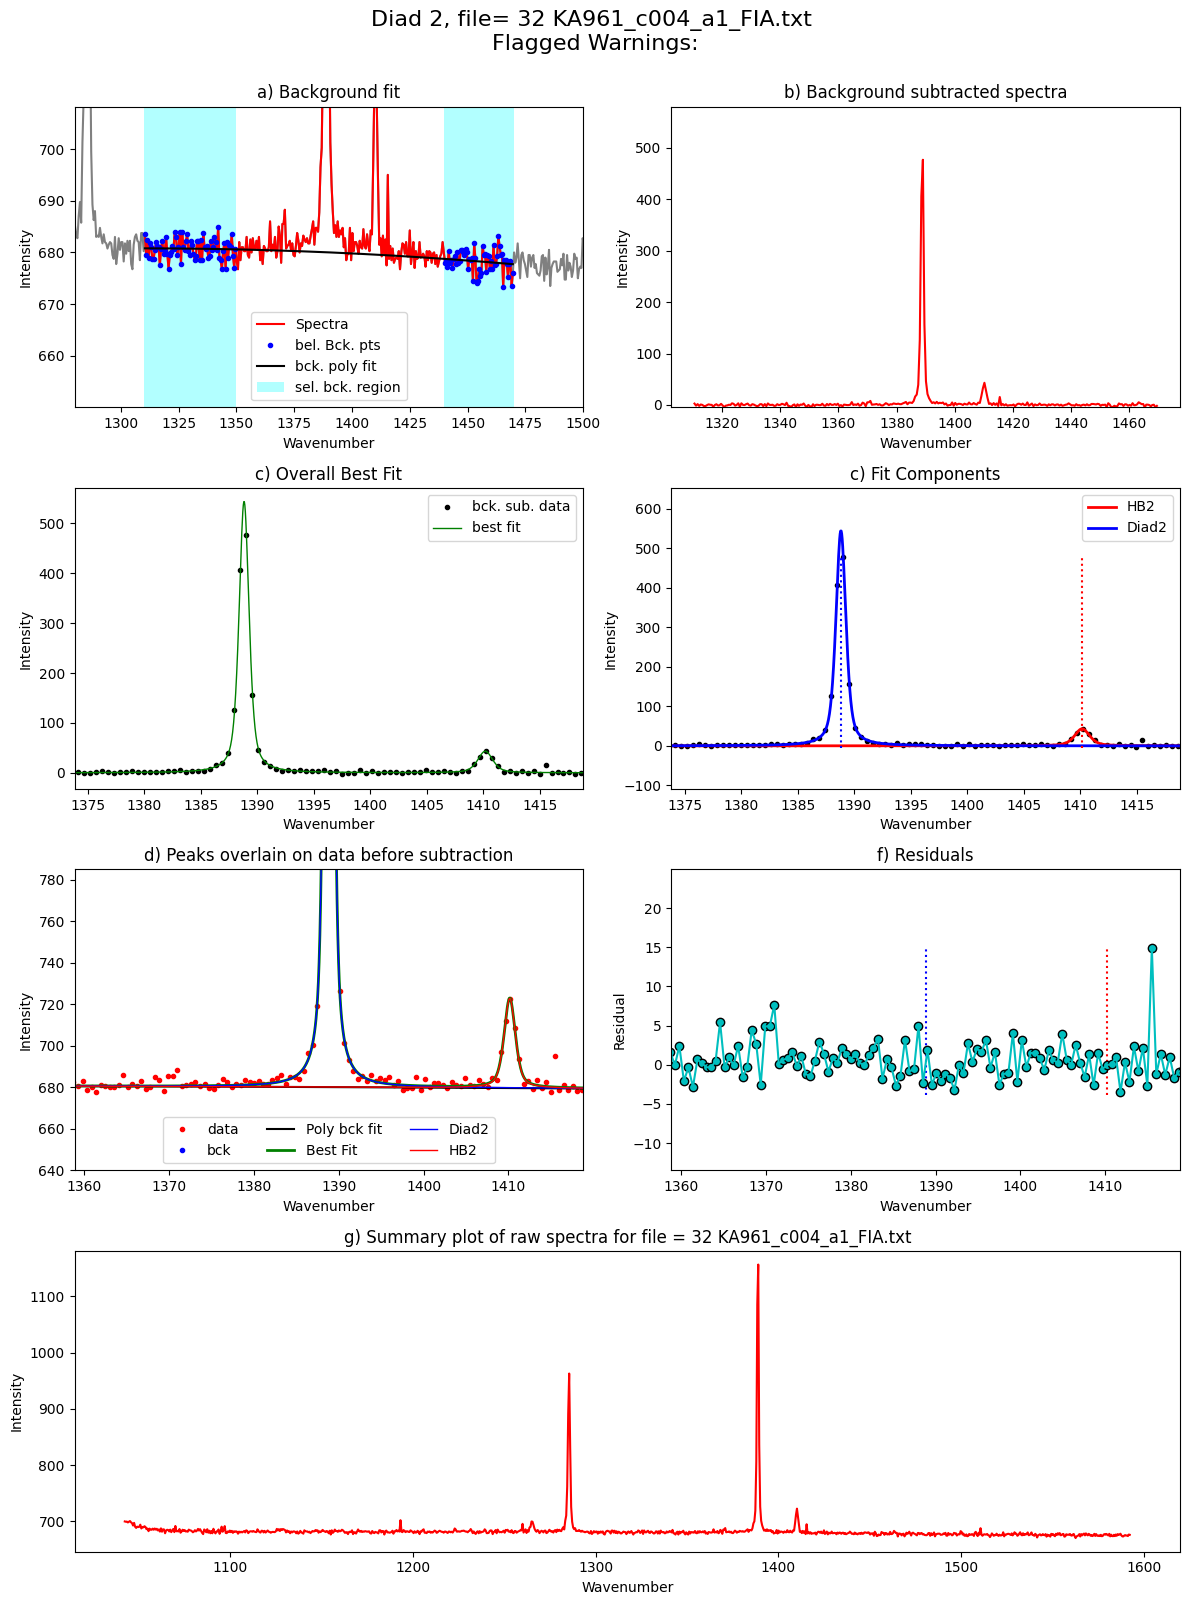

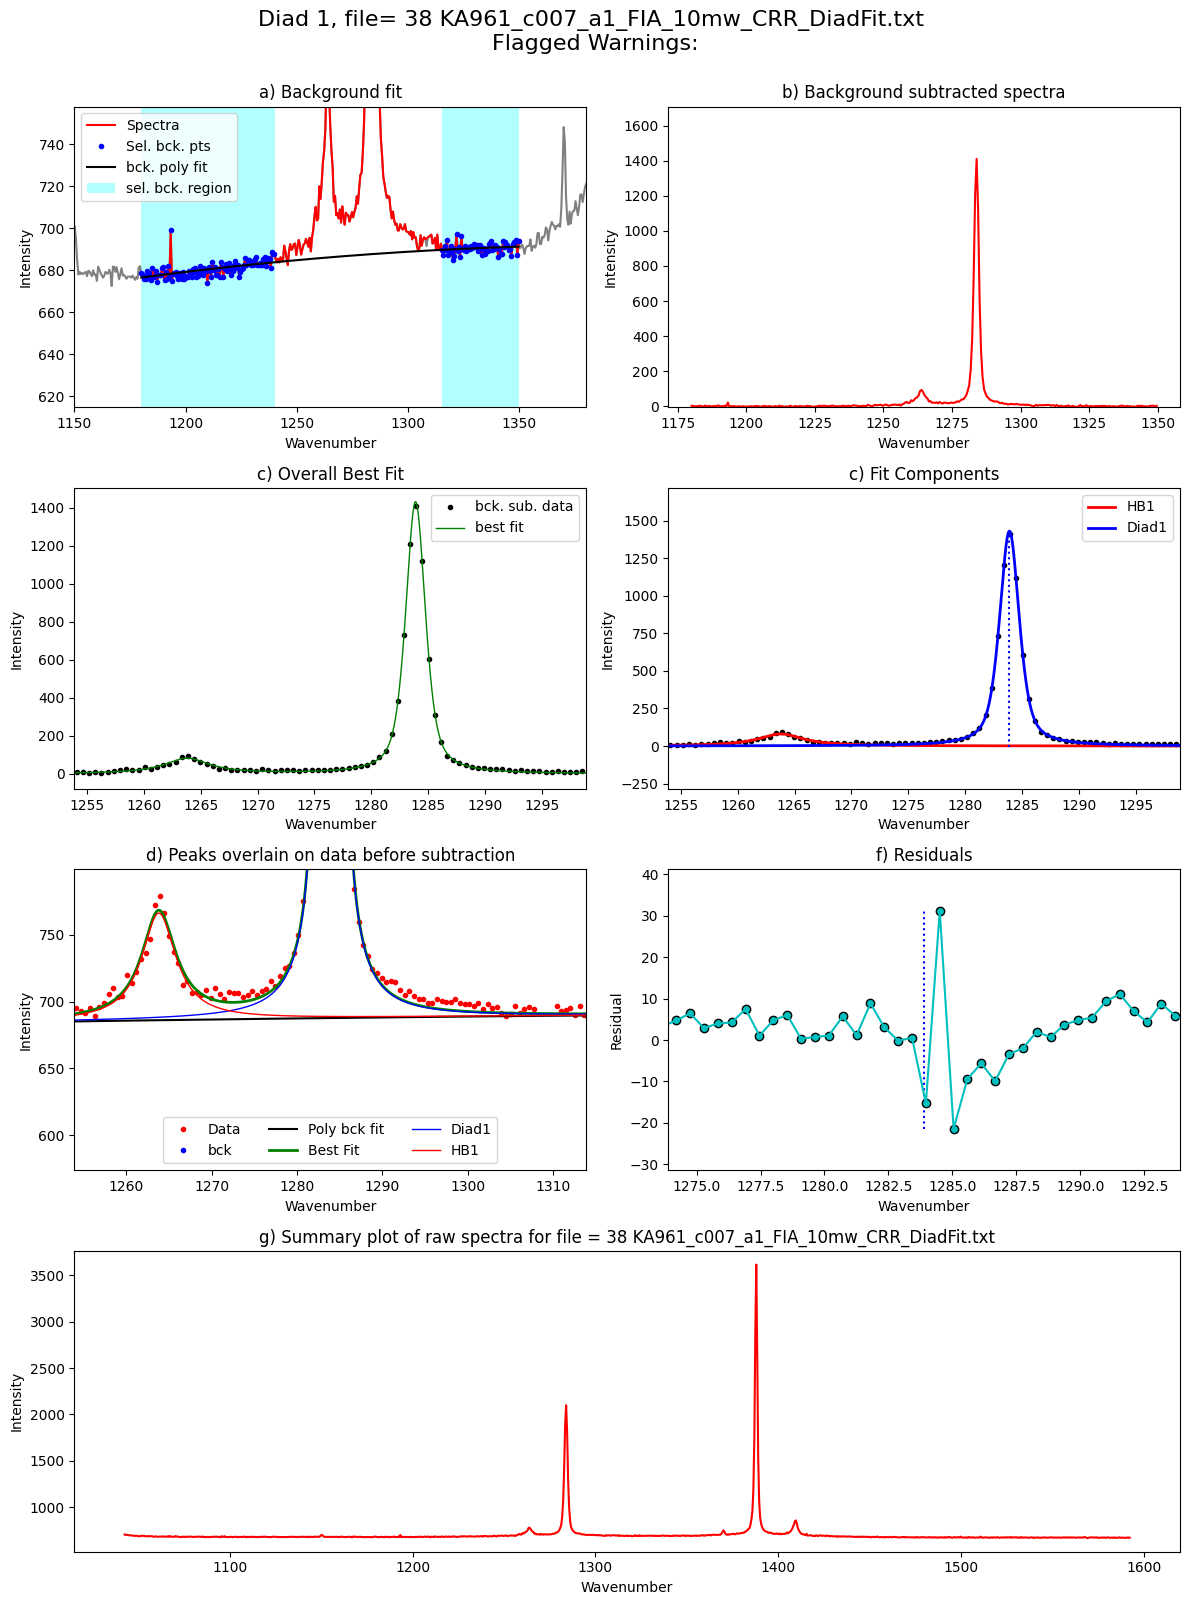

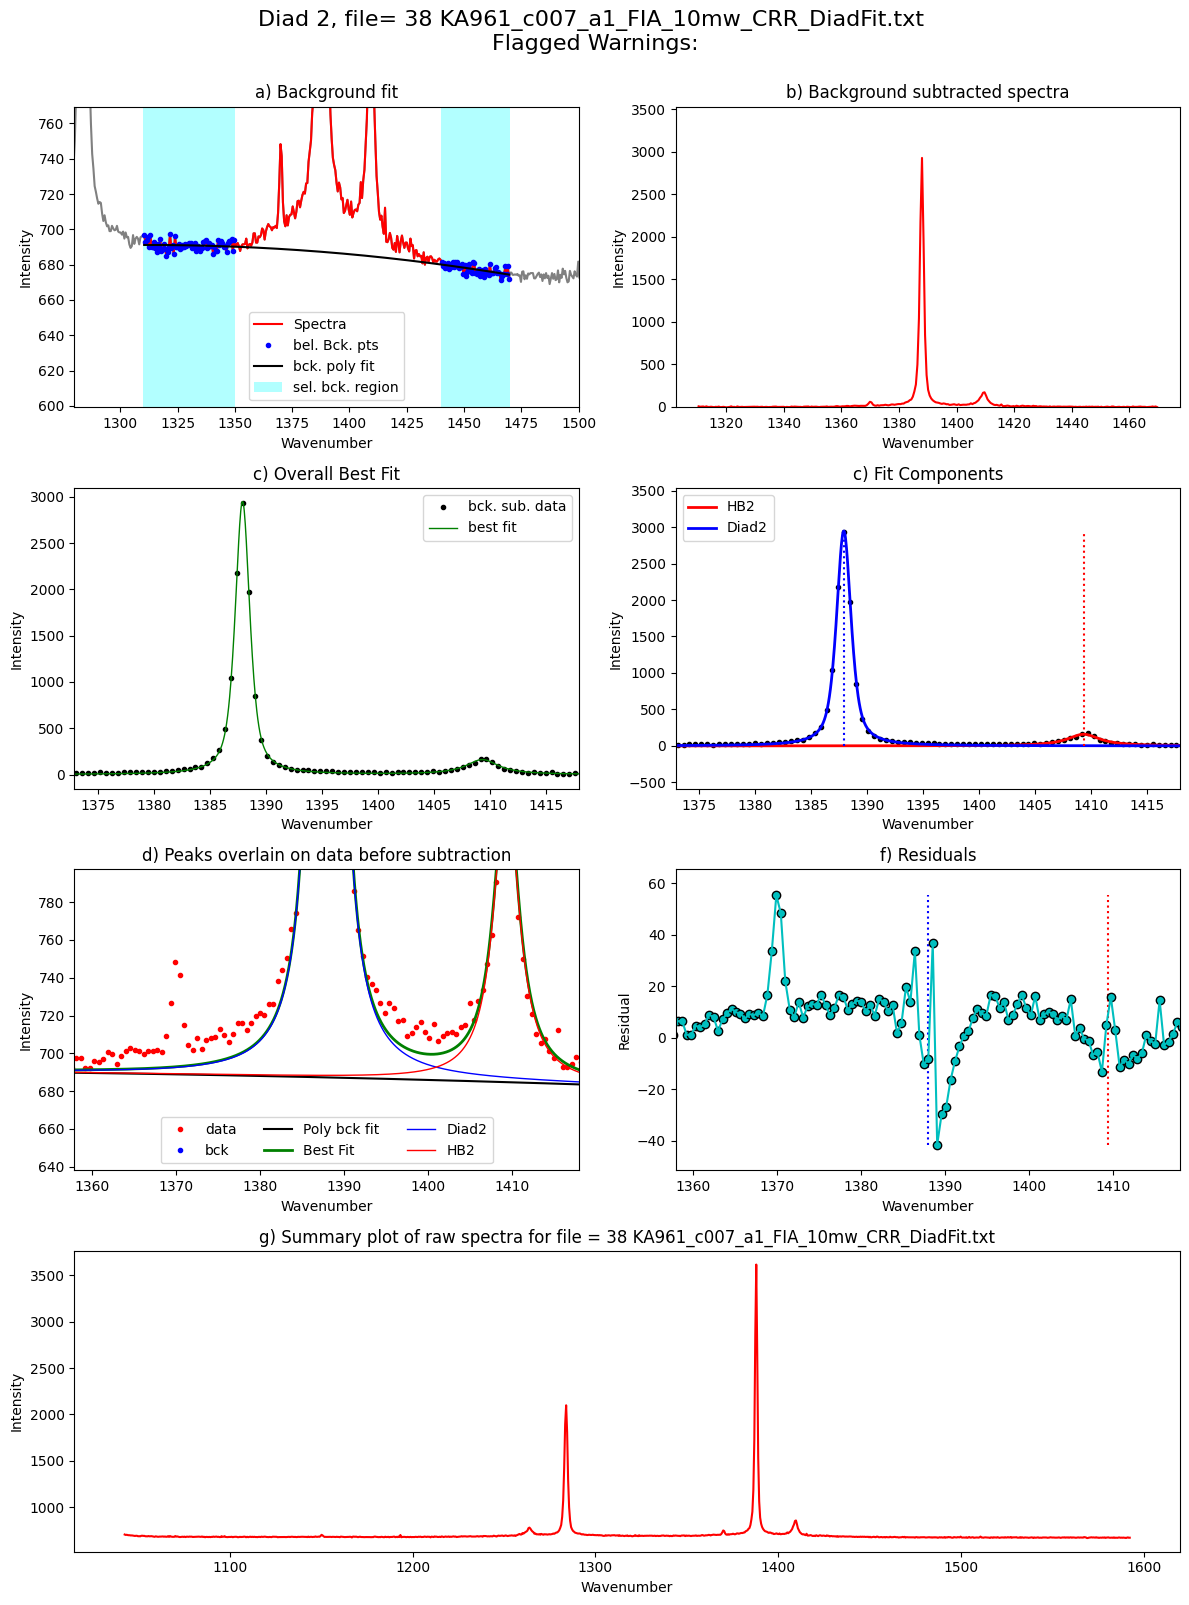

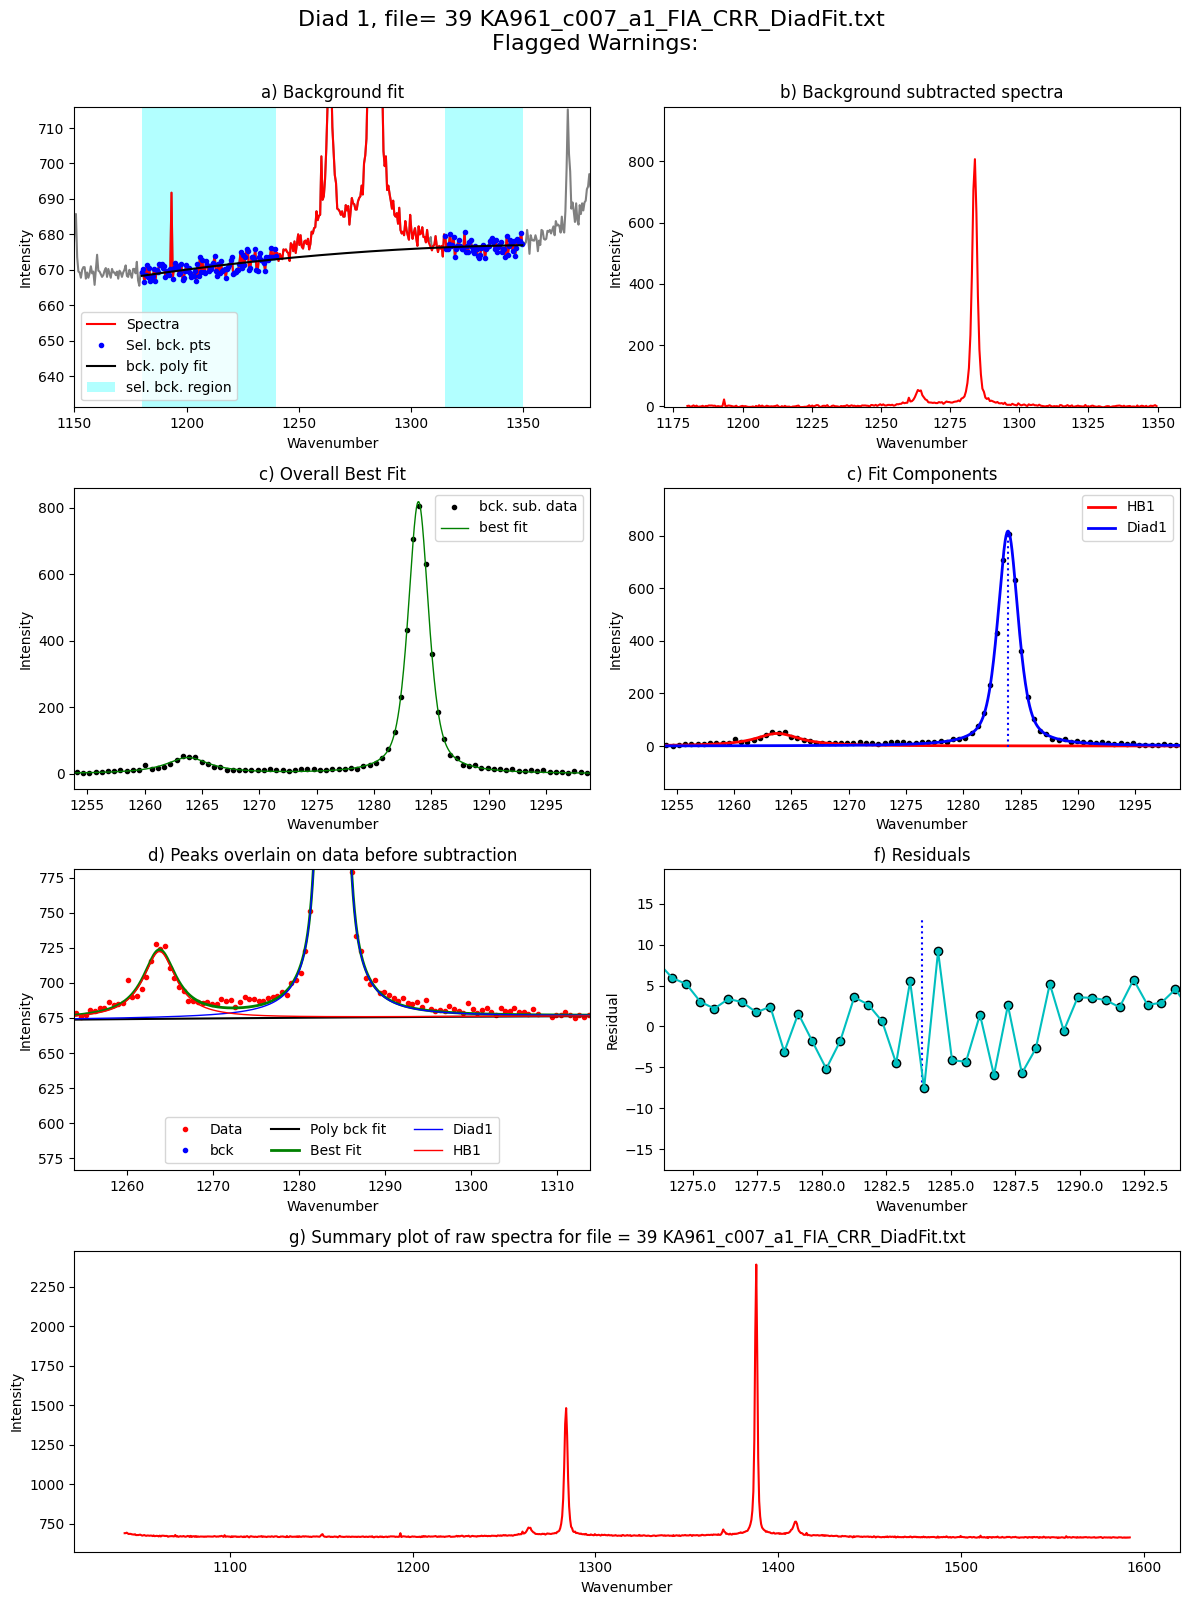

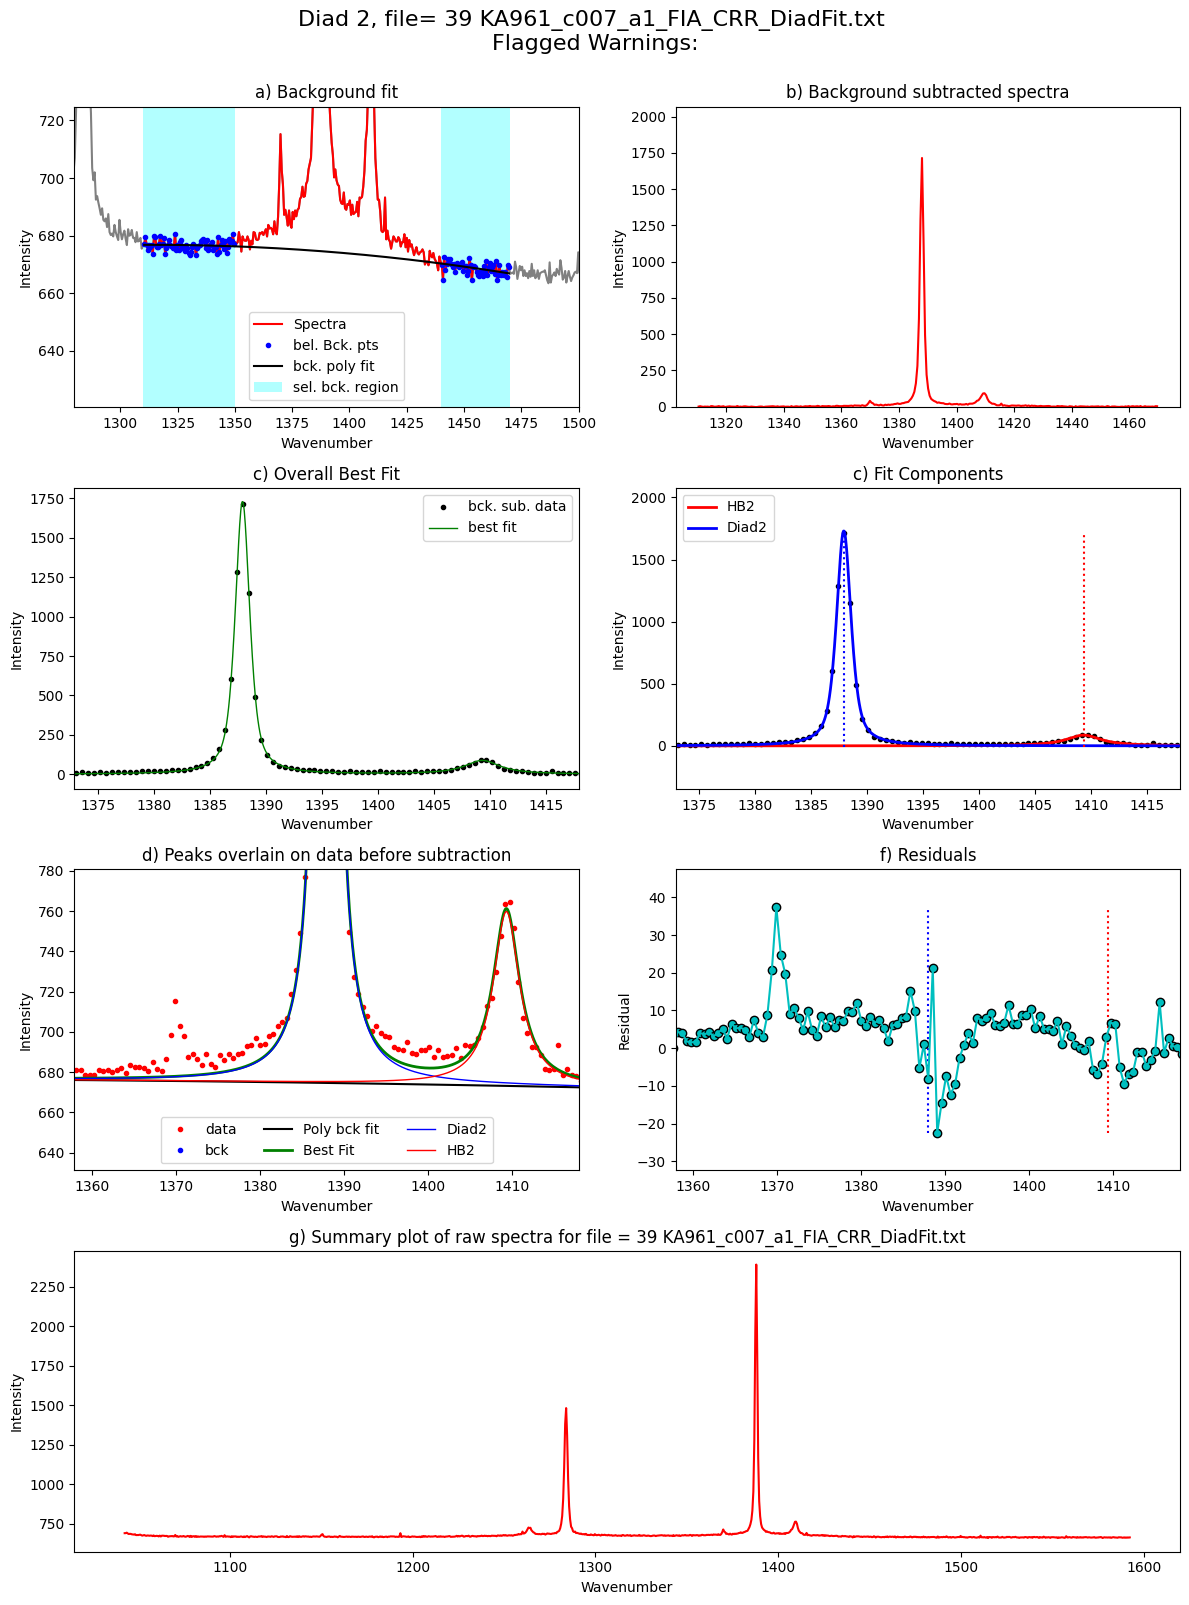

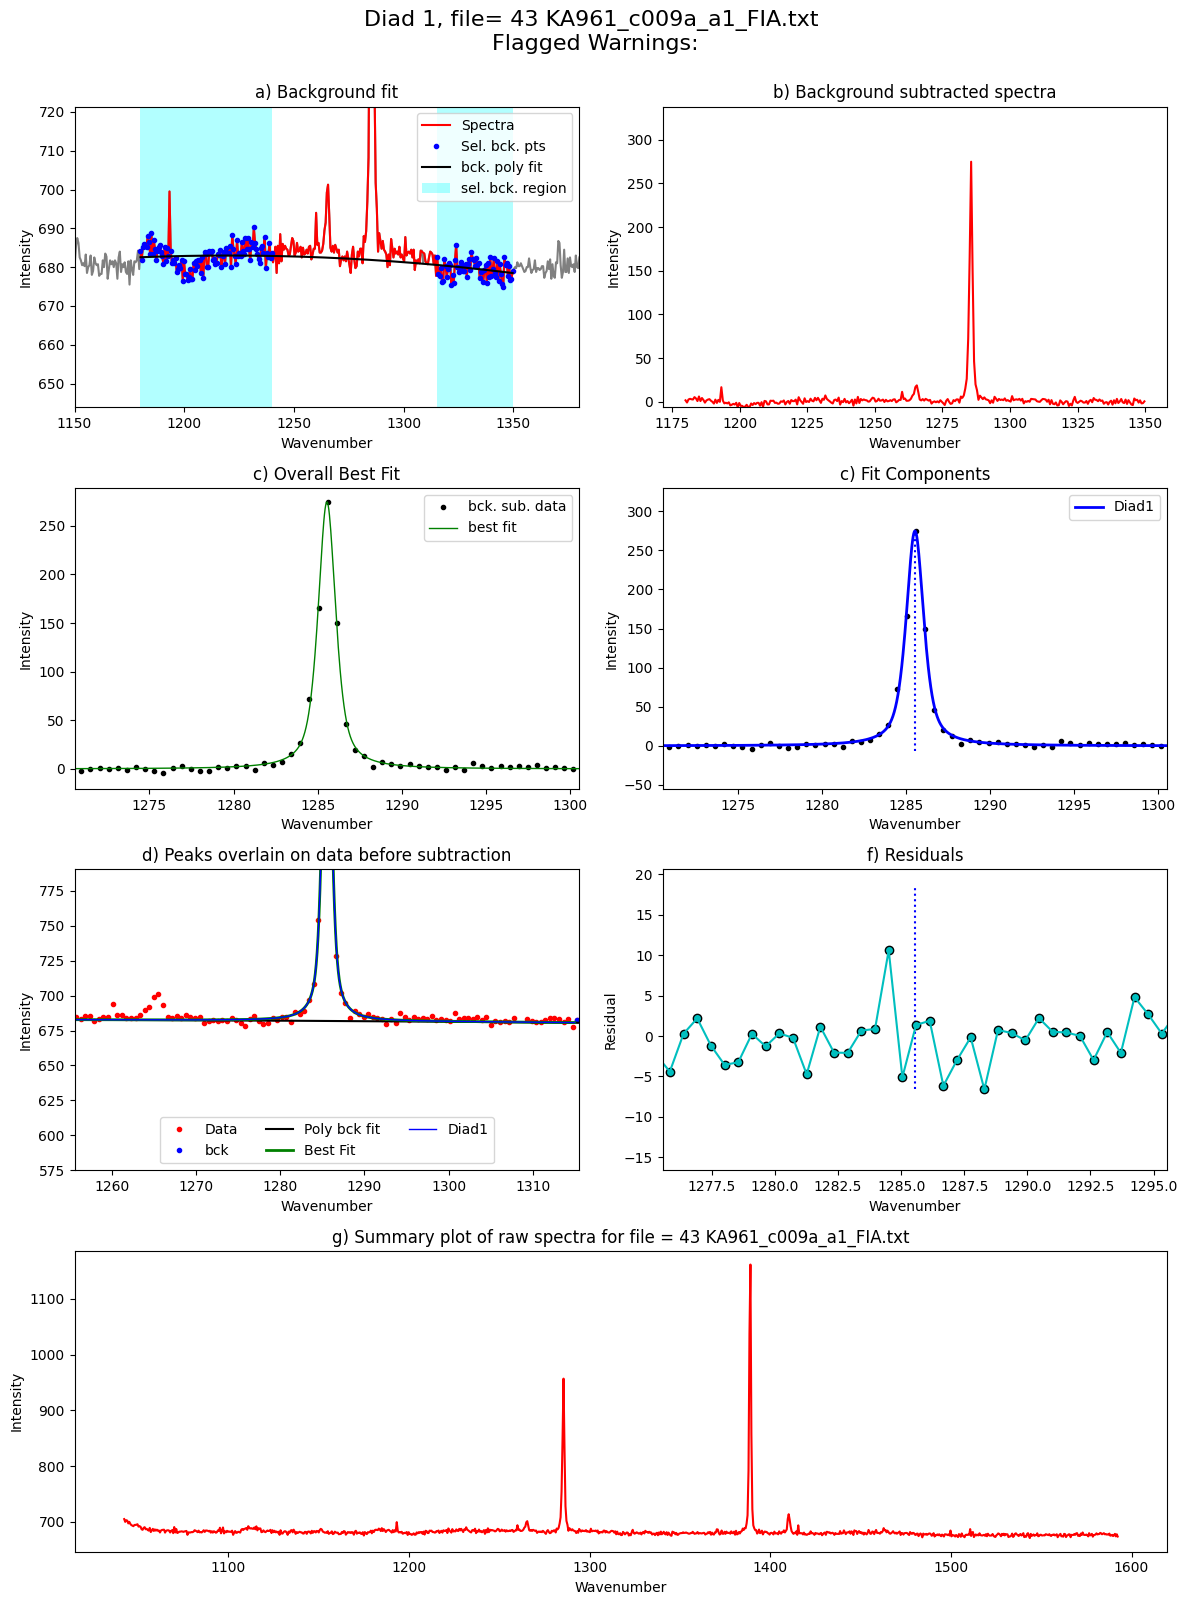

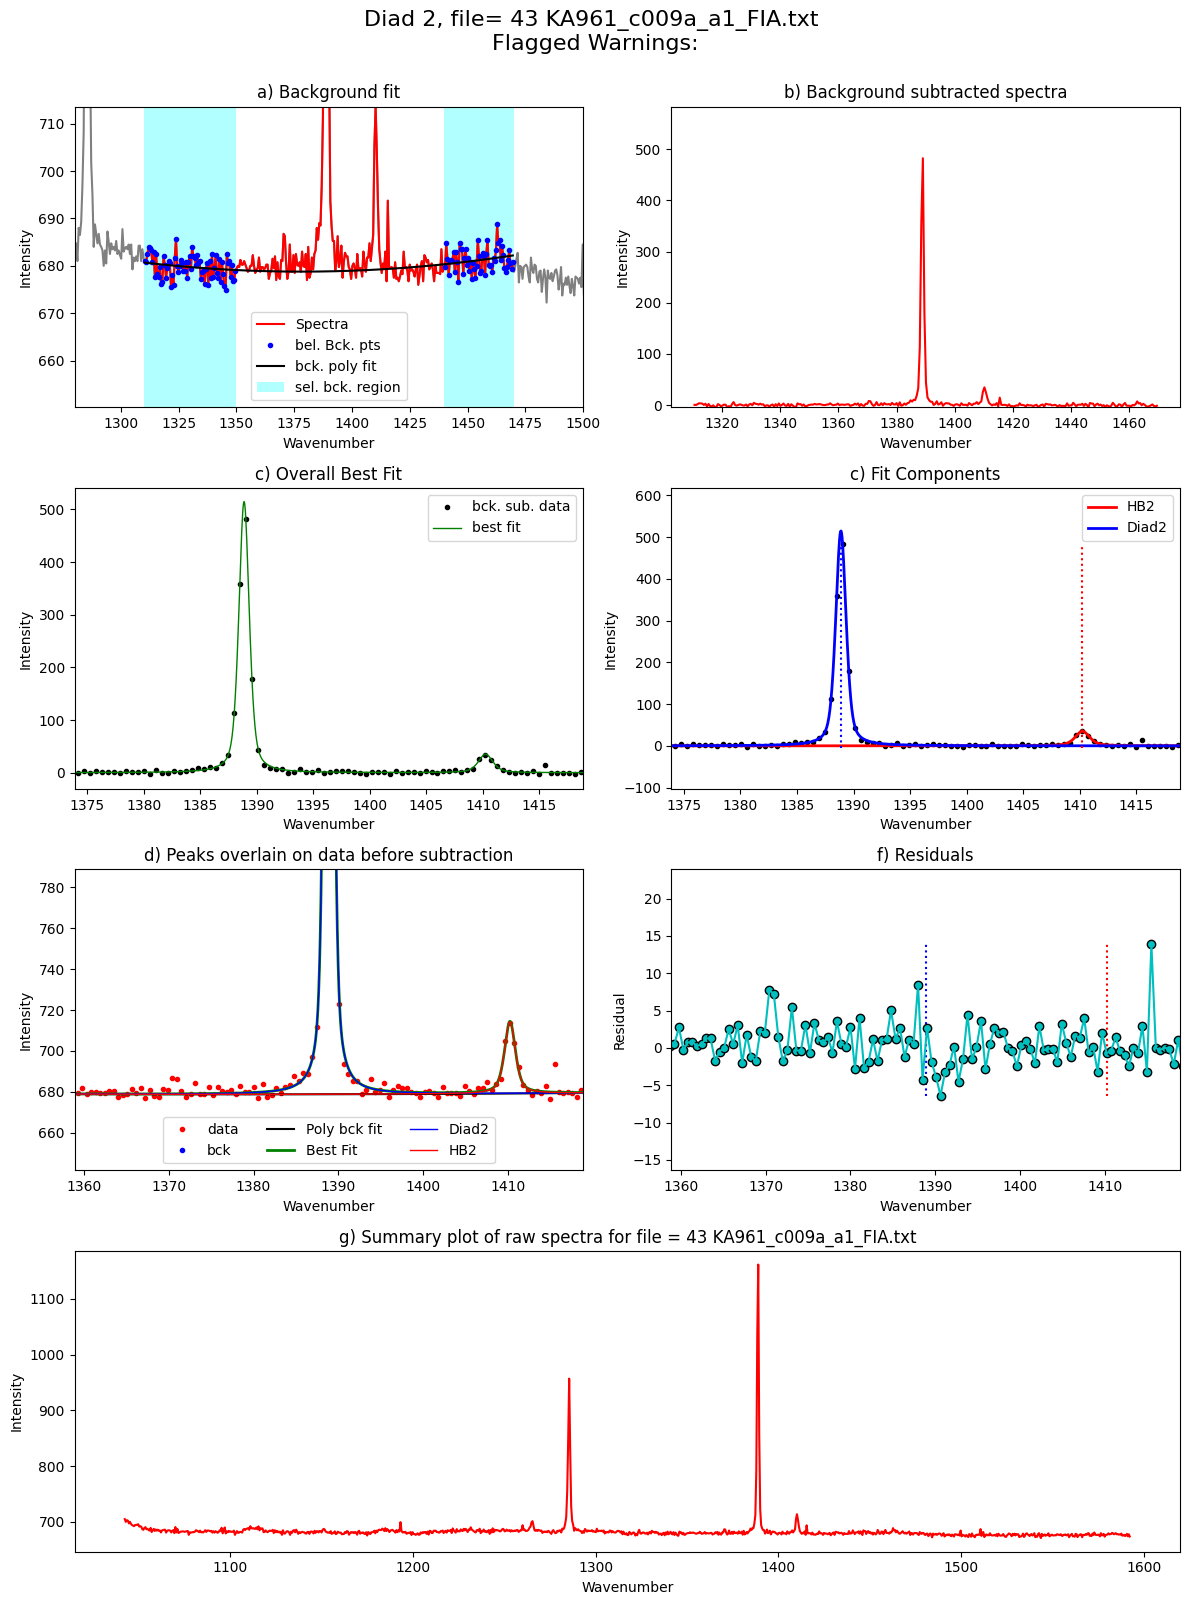

In [43]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [44]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [45]:
combo

filename   Splitting   Split_σ  \
0                    KA961_c001_a1_FIA  103.347303  0.002622   
1                                   de  103.368371  0.003647   
2                KA961_c002a_a1_FIA_r1  103.392083  0.006548   
3                KA961_c002a_a1_FIA_r2  103.369270  0.006962   
4    KA961_c002a_a1_FIA_r3_CRR_DiadFit  103.374395  0.030012   
5                KA961_c002a_a1_FIB_r1  103.407171  0.004217   
6                KA961_c002a_a1_FIB_r2  103.388366  0.006193   
7    KA961_c002a_a1_FIB_r3_CRR_DiadFit  103.396856  0.004388   
8                    KA961_c004_a1_FIA  103.354119  0.006882   
9   KA961_c007_a1_FIA_10mw_CRR_DiadFit  104.037879  0.003352   
10       KA961_c007_a1_FIA_CRR_DiadFit  104.048679  0.003716   
11                  KA961_c009a_a1_FIA  103.339913  0.008362   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1285.536729        0.002315             723.181444   
1           1285.513814        0.003330             531.587834   
2           1285.483080        0.006244             344.285031   
3           1285.496014        0.006621             334.919188   
4           1285.492019        0.029936             331.467725   
5           1285.441433        0.003772             399.409794   
6           1285.445979        0.005951             375.916664   
7           1285.448020        0.004044             364.238729   
8           1285.478199        0.006535             287.259127   
9           1283.895388        0.002532            1431.232814   
10          1283.881812        0.002942             819.024493   
11          1285.545879        0.007910             274.669332   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1285.536779       1285.808093           0.686819        1.868469   
1        1285.513864        953.168564           0.672098        1.901442   
2        1285.483080        619.325300           0.652927        2.311426   
3        1285.496014        601.716877           0.671326        2.336279   
4        1285.492019        587.354392           0.642996        2.173993   
5        1285.441483        726.135066           0.670310        1.649510   
6        1285.445979        672.735815           0.655838        2.596830   
7        1285.448070        645.924875           0.651102        1.673774   
8        1285.478199        498.262632           0.671859        2.180967   
9        1283.895438       4018.338370           1.032897        4.490670   
10       1283.881862       2358.870825           1.059754        2.736116   
11       1285.545879        480.085962           0.625963        2.395633   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.068182      1.066055                  0.093657   
1   ...      1.077121      1.040441                  0.103665   
2   ...      1.171271      1.137066                  0.223655   
3   ...      1.140584      1.116981                  0.188755   
4   ...      1.164345      1.151874                  0.211347   
5   ...      1.202156      1.173077                  0.271015   
6   ...      1.203297      1.188976                  0.266659   
7   ...      1.186301      1.163386                  0.242602   
8   ...      1.133858      1.110687                  0.179868   
9   ...      1.062185      1.068841                  0.128461   
10  ...      1.001595      1.020619                  0.003380   
11  ...      1.099150      1.180723                  0.124129   

    Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0               0.001899      1.225806      1.222222   
1               0.002529      1.232258      1.223558   
2               0.003793      1.244300      1.247549   
3               0.004009      1.181818      1.165094   
4               0.003880      1.219048      1.209524   
5               0.003357      1.194444      1.178654   
6               0.003489      1.167683      1.154734   
7               0.003575      1.177914    

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [46]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()